In [336]:
from google.colab import drive
drive.mount('/content/drive')
import os
import shutil
os.chdir('/content/drive/My Drive/machine learning folder/Genetic Algorithm')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Genetic Algorithm

In [0]:
#importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import numpy as np

In [0]:
#helper function
def get_algo_det(clas=None, gen=None):
    gen = clas.gens[f'gen_{gen}']
    return gen['initial_pop_details'][:,:15],gen['initial_pop_details'][:,15], gen['initial_pop_details'][:,16], gen['total_fit']

In [0]:
#Genetic Algorithm
# np.random.seed(42)
class Genetic_Algorithm:
    
    #initialize class instance
    def __init__(self, Npop=50, Nchrom = 15, PC=None, PM=None):
        self.Npop = Npop
        self.Nchrom = Nchrom
        self.PC = PC
        self.PM = PM
        self.size = (self.Npop,self.Nchrom)
      
    #initialize population
    def init_pop(self,s=None):
        s = self.size if s == None else s
        self.pop = np.random.randint(0,2,s)
        return np.random.randint(0,2,s)
    
    #encode operator
    def encode(self,chroms=None):
        
        #converts binary to decimal
        ex = np.array([sorted(list(range(chroms.shape[1])), reverse=True)])  
        squarer = lambda x: 2 ** x
        vfunc = np.vectorize(squarer)    
        ch_fit = np.dot(chroms, vfunc(ex).reshape((-1,1)))
        
        return ch_fit
    
    #decode operator
    def decode(self, nw_chrms):
        
        #converts decimal to binary
        bit_rep = np.random.randint(0,1,(len(nw_chrms),self.Nchrom))
        
        for i in range(len(nw_chrms)):
            bit_rep[i] =  [int(i) for i in np.binary_repr(nw_chrms[i][0], width=self.Nchrom)]
            
        return bit_rep
    
    #fitness operator
    def fitness(self,chroms):
#         chroms = self.pop
        ch_fit = self.encode(chroms)
        self.t_fit = sum(ch_fit)
        return ch_fit,(ch_fit/self.t_fit)
    
    #selection operator
    def selection(self, fit_fun=None,size=None):
        fit_fun = np.sort(fit_fun, axis=0)[size:]
        nw_chrms_int = (fit_fun*self.t_fit).astype(int)
        nw_chrms = self.decode(nw_chrms_int)
        return nw_chrms, nw_chrms_int,fit_fun
        
        
    #crossover operator
    def crossover(self, prt_chroms = None, rlow=(0,6), rhigh=(8,13), mutate=True):
        # Intialize empty array for new chromosomes
        nw_chrm = np.empty((0,prt_chroms.shape[1]))

        #start the crossover 
        for i in range(prt_chroms.shape[0]):

            #get two random indices
            idx = np.random.randint(0,prt_chroms.shape[0],2)

            #get the split points
            f = round(np.random.uniform(low=rlow[0], high=rhigh[0]))
            g = round(np.random.uniform(low=rlow[1], high=rhigh[1]))

            #copy the chromosomes to a new location for manipulation
            test_copy = np.copy(np.array([prt_chroms[idx[0]], prt_chroms[idx[1]]]))

            #split the chromosomes
            _1st, _2nd, _3rd, _4th = np.copy(test_copy[0][0:f+1]), np.copy(test_copy[0][g+1:]), np.copy(test_copy[1][0:f+1]), np.copy(test_copy[1][g+1:])

            #fix the splitted chromosomes
            test_copy[0][0:f+1],test_copy[0][g+1:]  = _3rd, _4th
            test_copy[1][0:f+1], test_copy[1][g+1:] = _1st, _2nd

            #add the children to the new population
            nw_chrm = np.r_[nw_chrm,test_copy]
            
        if mutate == False:
            return nw_chrm
        else:
            for i in range(nw_chrm.shape[0]):
                nw_chrm[i] = self.mutation(chrom=nw_chrm[i])                
            return nw_chrm
    
    #mutation operator
    def mutation(self, chrom=None, rlow=(0.09,0.6), rhigh=(0.5,1.0)):
        #mutation implementation

        #get the 2 genes to mutate
        f = round(np.random.uniform(low=rlow[0], high=rhigh[0])*15)-1
        g = round(np.random.uniform(low=rlow[1], high=rhigh[1])*15)-1

        #mutate randomly selected chromosomes and replace
        chrom[f], chrom[g] = 1 or chrom[f], 1 or chrom[f]
        
        return chrom
    
    #Elitism Operator
    def elitism(self, prnt, chld):
        nw_pop = np.r_[prnt,chld]
        
        self.pop = nw_pop
        #calculate fitness and save parameters
        ch_fitv, ch_fit = self.fitness(self.pop)


        #select new chromosomes for mating and save parameters
        ch_sel,chsel_int, chsel_fit = self.selection(ch_fit,int(nw_pop.shape[0]/2))
        return ch_sel

    #   train Algorithm
    def train(self, gcounts = 1):
        
        self.gens = dict()
        self.gens['statistics'] = dict()
#         self.gens['statistics']['min'] = dict()
        self.gens['statistics']['max'] = dict()
#         self.gens['statistics']['avg'] = dict()
        
        for count in range(gcounts):
            #Initialise dict to hold gen parameters
            gens = dict()

            #initialise population
            test.init_pop()


            #calculate fitness and save parameters
            ch_fitv, ch_fit = self.fitness(self.pop)
            gens[f'initial_pop_details'] = np.c_[np.copy(self.pop),ch_fitv,ch_fit]
            gens[f'total_fit'] = sum(ch_fitv)

            #Generation Statistics
#             self.gens['statistics']['min'].update({count: ch_fit.min()})
            self.gens['statistics']['max'].update({count: ch_fit.max()})
#             self.gens['statistics']['avg'].update({count: ch_fit.sum()/ch_fit.shape[0]})
            
            #select new chromosomes for mating and save parameters
            ch_sel,chsel_int, chsel_fit = self.selection(ch_fit,int(self.pop.shape[0]/2))
            gens[f'selected_pop_details'] = np.c_[np.copy(ch_sel), chsel_int,chsel_fit]

            #Crossover and mutation Operations and save parameters
            chld_chrm= self.crossover(prt_chroms=ch_sel,mutate=True)
            
            #Elitism Operations and save parameter
            chld_chrm = self.elitism(self.pop, chld_chrm)
            self.pop = chld_chrm
            
            

            #save gen's paramters into the class instance parameter
            self.gens[f'gen_{count+1}'] = gens

In [360]:
#for pop 100 gen 500
#Train Aligorithm
test = Genetic_Algorithm(Npop=100, Nchrom = 15, PC = 0.7, PM = 0.01)
test_case = test.train(500)
chrom, phen,fit, total = get_algo_det(test, gen=50)
print(f'chromosome = {test.decode(np.array([[int(phen.max())]]))} , phenotype = {phen.max()}')

chromosome = [[1 1 1 1 1 1 1 1 1 0 1 0 0 0 1]] , phenotype = 32721.0


In [361]:
chrom, phen,fit, total = get_algo_det(test, gen=1)
chrom

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.]])

In [0]:
np.savetxt('test.txt', chrom, delimiter=',')

In [363]:
chrom, phen,fit, total = get_algo_det(test, gen=50)
chrom

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 1., 0., 1.]])

Text(0.5, 1.0, 'overall fitness functions performance')

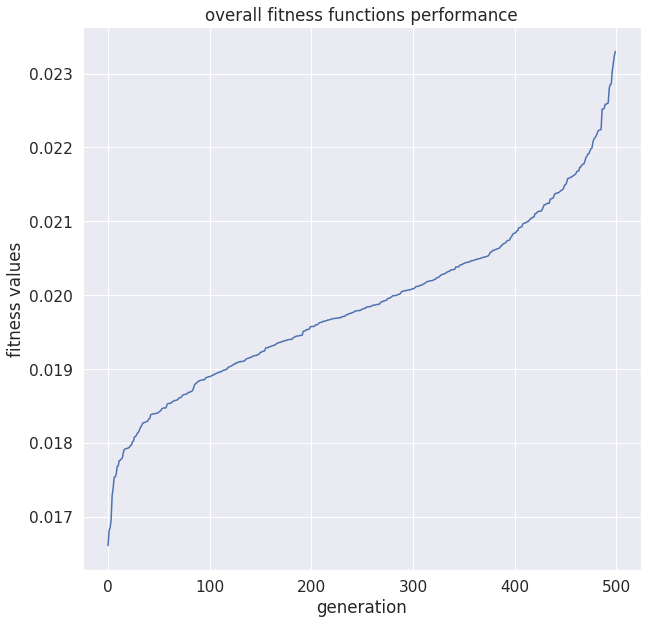

In [364]:
data = sorted(list(test.gens['statistics']['max'].values()))
fig = plt.figure(figsize=(10,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('overall fitness functions performance')

Text(0.5, 1.0, 'search space')

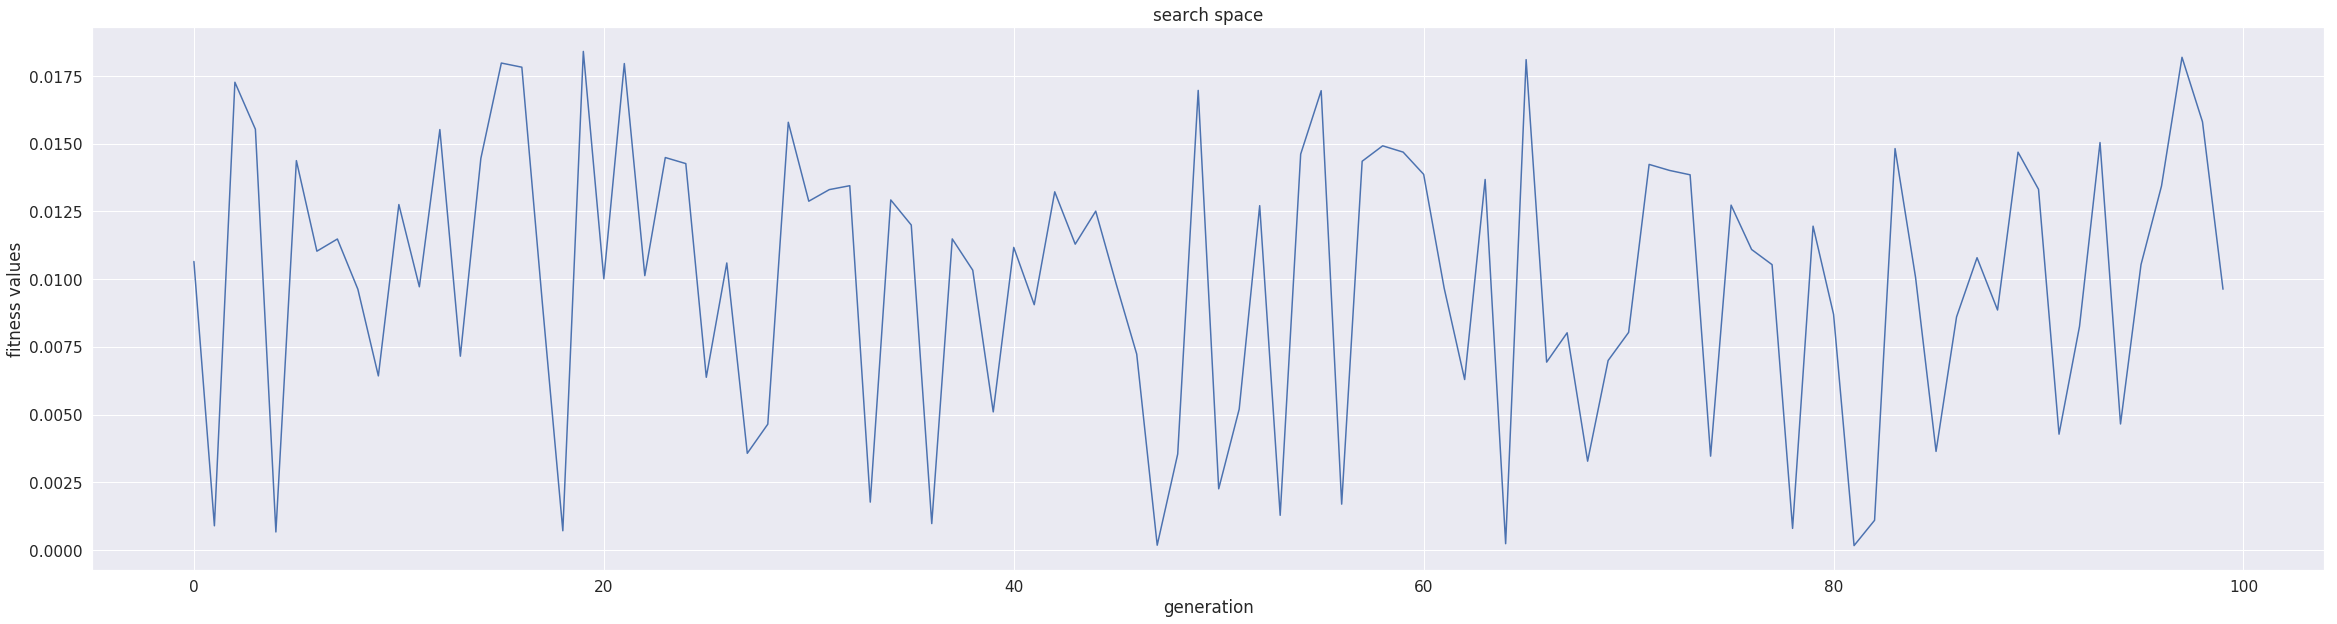

In [365]:
data = pd.DataFrame(fit)
fig = plt.figure(figsize=(40,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('search space')

In [367]:
#for pop 100 gen 1000
# from Algorithm_Class import Genetic_Algorithm

test = Genetic_Algorithm(Npop=100, Nchrom = 15, PC = 0.7, PM = 0.01)
test_case = test.train(1000)
chrom, phen,fit, total = get_algo_det(test, gen=1000)
print(f'chromosome = {test.decode(np.array([[int(phen.max())]]))} , phenotype = {phen.max()}')

chromosome = [[1 1 1 1 1 0 0 1 1 1 0 1 1 0 1]] , phenotype = 31981.0


In [368]:
chrom, phen,fit, total = get_algo_det(test, gen=1)
chrom

array([[1., 0., 1., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [369]:
chrom, phen,fit, total = get_algo_det(test, gen=1000)
chrom

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 0.]])

Text(0.5, 1.0, 'overall fitness functions performance')

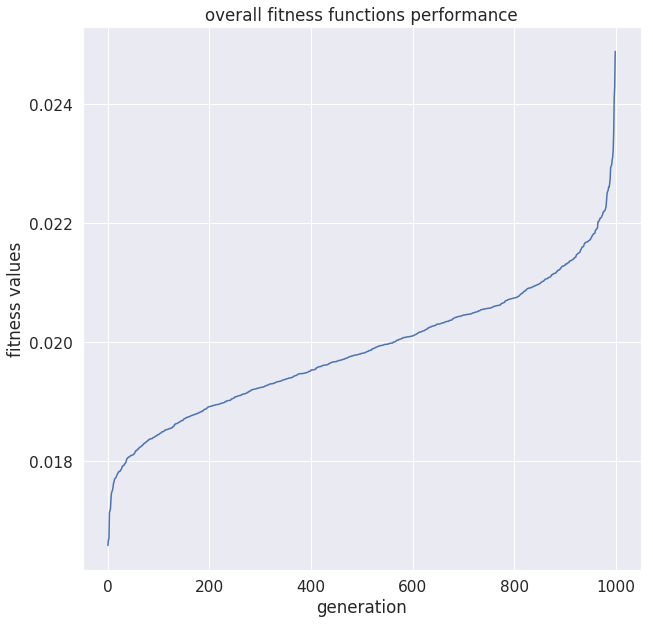

In [370]:
data = sorted(list(test.gens['statistics']['max'].values()))
fig = plt.figure(figsize=(10,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('overall fitness functions performance')

Text(0.5, 1.0, 'search space')

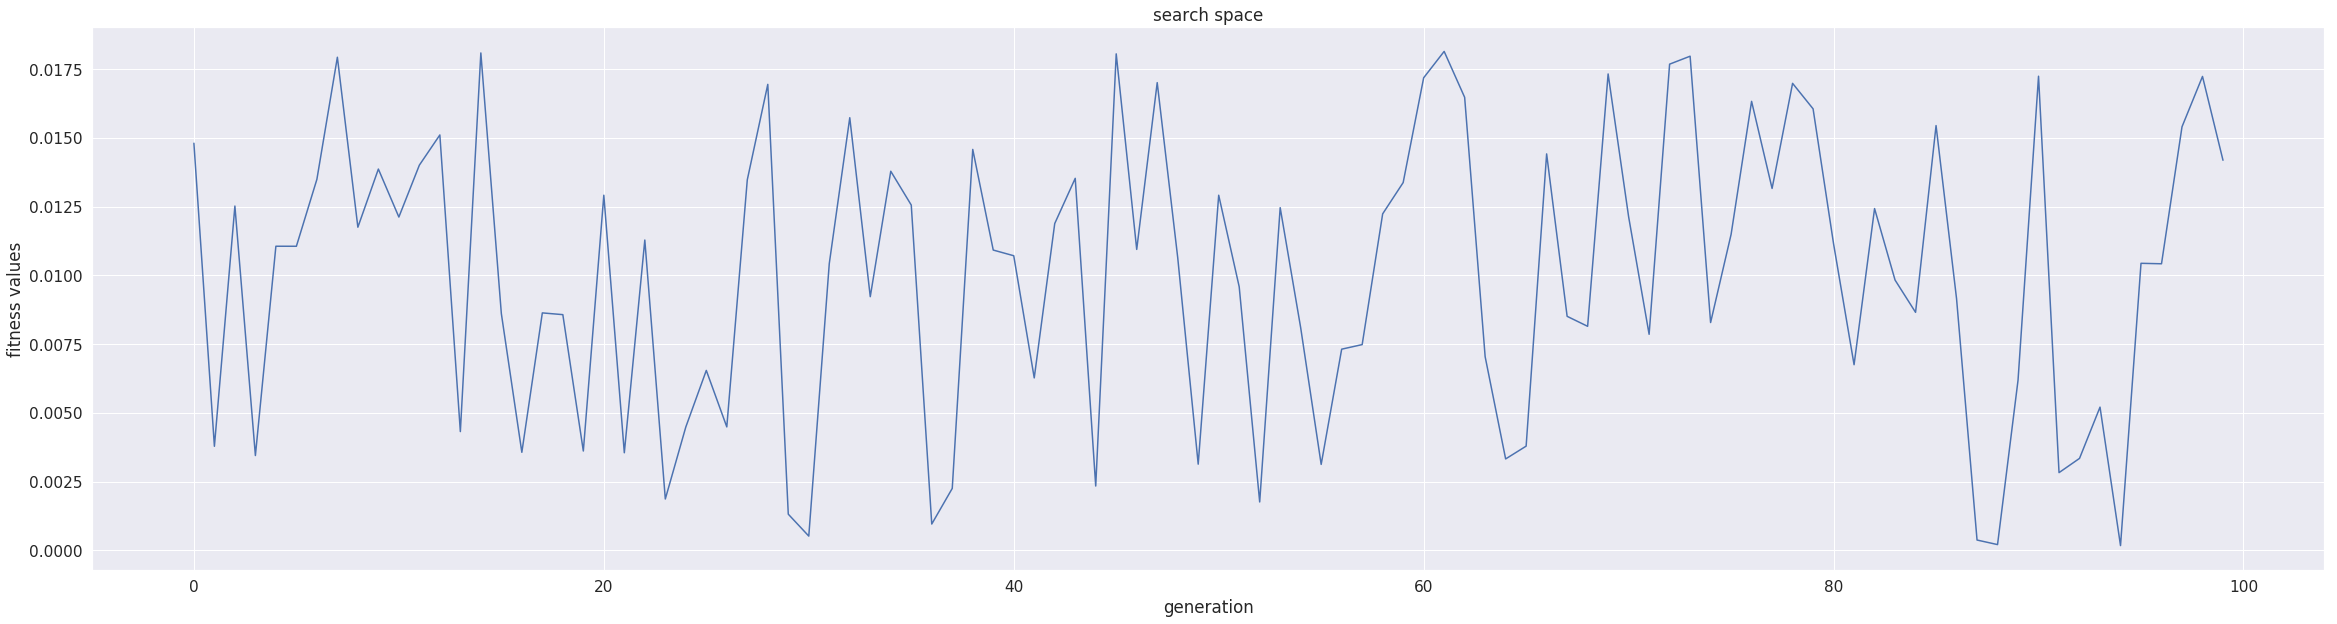

In [371]:
data = pd.DataFrame(fit)
fig = plt.figure(figsize=(40,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('search space')

In [377]:
#for pop 50 gen 100
# from Algorithm_Class import Genetic_Algorithm

test = Genetic_Algorithm(Npop=50, Nchrom = 15, PC = 0.7, PM = 0.01)
test_case = test.train(100)
chrom, phen,fit, total = get_algo_det(test, gen=100)
print(f'chromosome = {test.decode(np.array([[int(phen.max())]]))} , phenotype = {phen.max()}')

chromosome = [[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]] , phenotype = 32255.0


In [378]:
chrom, phen,fit, total = get_algo_det(test, gen=1)
chrom

array([[1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.],
       [0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 1.

In [379]:
chrom, phen,fit, total = get_algo_det(test, gen=100)
chrom

array([[0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.],
       [1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.],
       [0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.],
       [1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.],
       [1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 1., 0.

Text(0.5, 1.0, 'overall fitness functions performance')

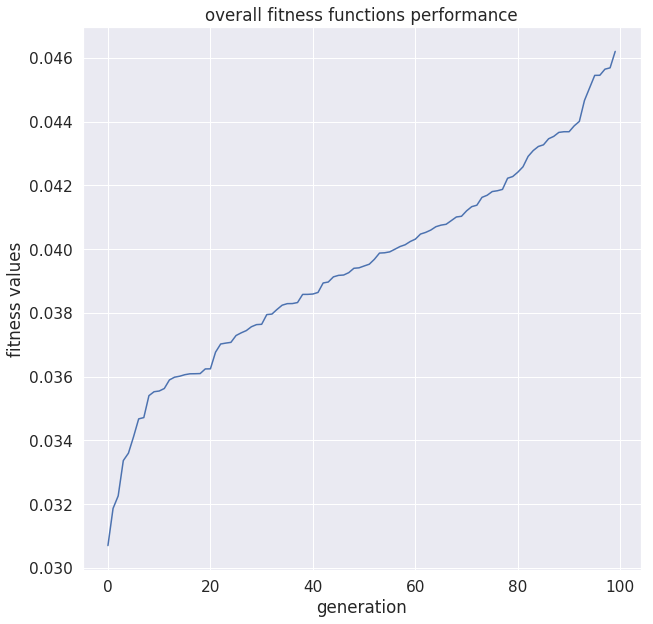

In [380]:
data = sorted(list(test.gens['statistics']['max'].values()))
fig = plt.figure(figsize=(10,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('overall fitness functions performance')

Text(0.5, 1.0, 'search space')

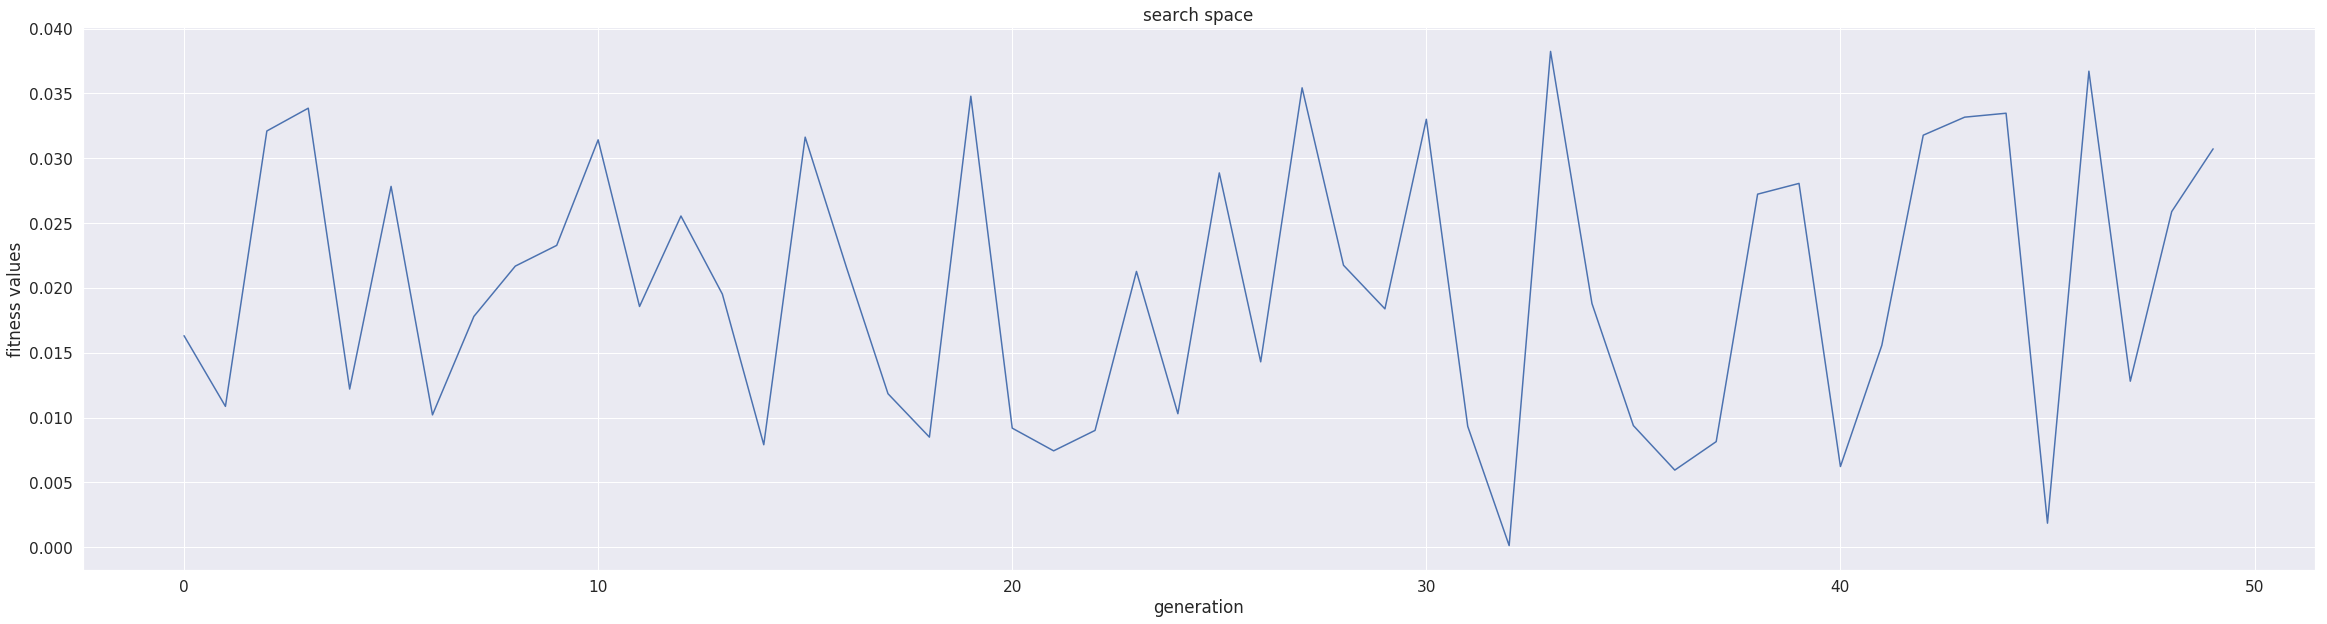

In [381]:
data = pd.DataFrame(fit)
fig = plt.figure(figsize=(40,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('search space')


In [382]:
#for pop 50 gen 250
# from Algorithm_Class import Genetic_Algorithm
gen = 250
test = Genetic_Algorithm(Npop=50, Nchrom = 15, PC = 0.7, PM = 0.01)
test_case = test.train(gen)
chrom, phen,fit, total = get_algo_det(test, gen=gen)
print(f'chromosome = {test.decode(np.array([[int(phen.max())]]))} , phenotype = {phen.max()}')

chromosome = [[1 1 1 1 1 0 1 1 1 1 0 1 0 1 0]] , phenotype = 32234.0


In [383]:
chrom, phen,fit, total = get_algo_det(test, gen=1)
chrom

array([[0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.],
       [1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1., 1., 1.

In [384]:
chrom, phen,fit, total = get_algo_det(test, gen=250)
chrom

array([[0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.],
       [1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.],
       [1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.],
       [0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.],
       [1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.],
       [1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0.

Text(0.5, 1.0, 'overall fitness functions performance')

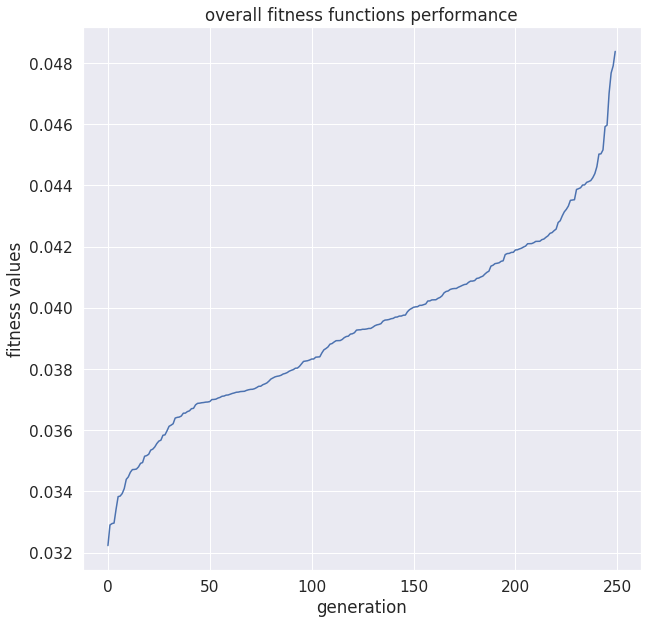

In [385]:
data = sorted(list(test.gens['statistics']['max'].values()))
fig = plt.figure(figsize=(10,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('overall fitness functions performance')

Text(0.5, 1.0, 'search space')

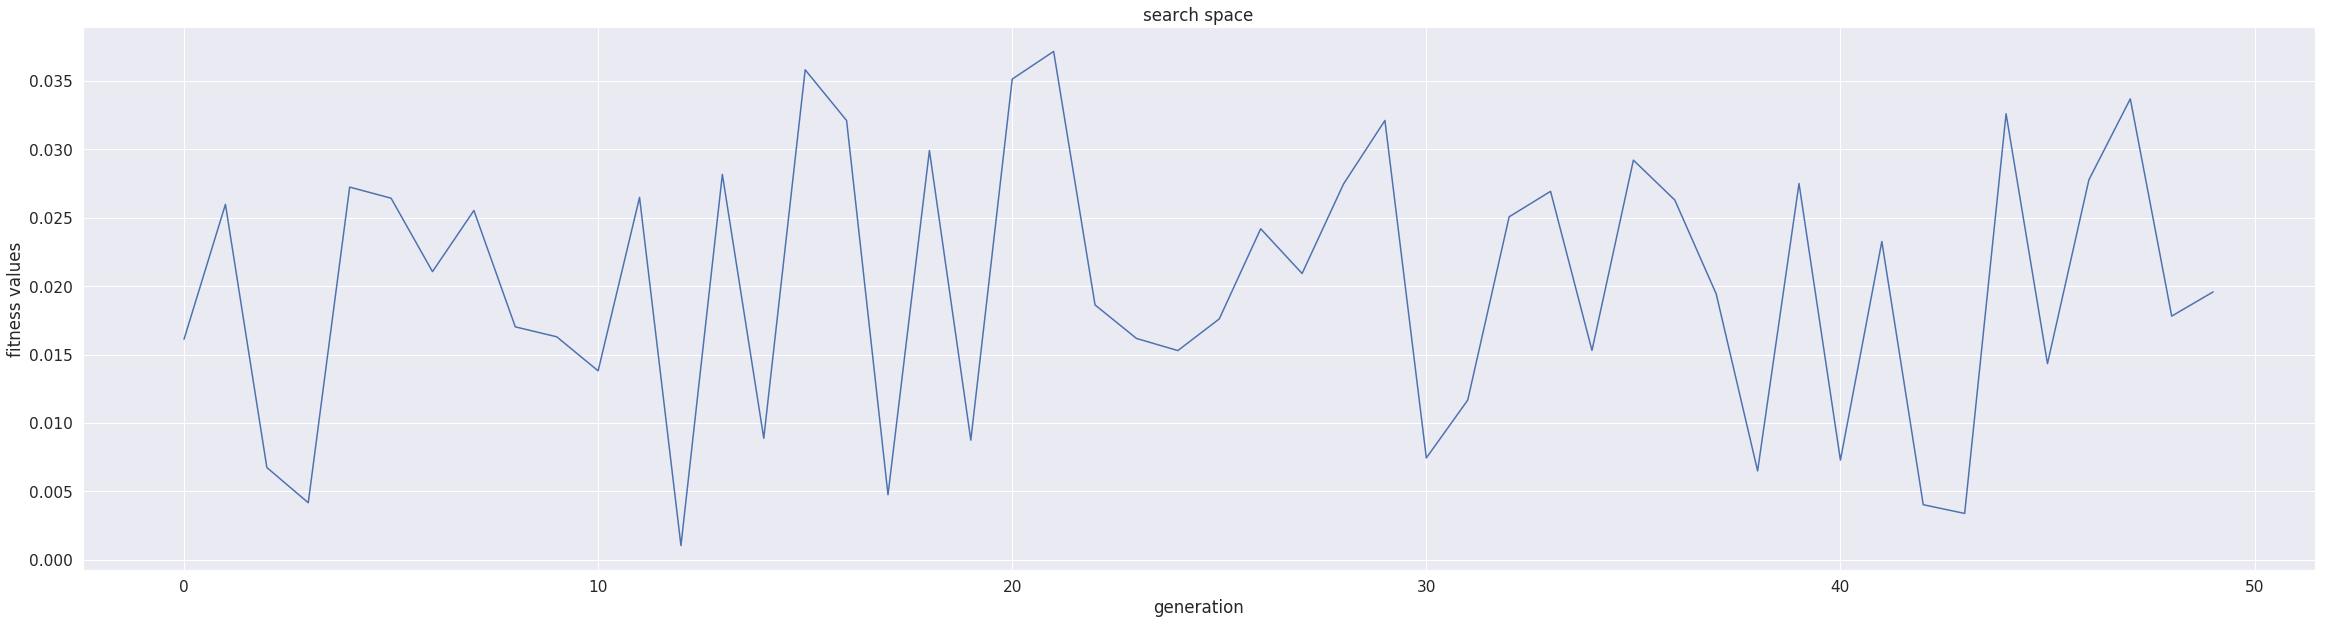

In [386]:
data = pd.DataFrame(fit)
fig = plt.figure(figsize=(40,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('search space')

In [387]:
#for pop 50 gen 500
# from Algorithm_Class import Genetic_Algorithm
gen = 500
test = Genetic_Algorithm(Npop=50, Nchrom = 15, PC = 0.7, PM = 0.01)
test_case = test.train(gen)
chrom, phen,fit, total = get_algo_det(test, gen=gen)
print(f'chromosome = {test.decode(np.array([[int(phen.max())]]))} , phenotype = {phen.max()}')

chromosome = [[1 1 1 1 1 1 1 1 0 1 0 0 1 1 0]] , phenotype = 32678.0


Text(0.5, 1.0, 'overall fitness functions performance')

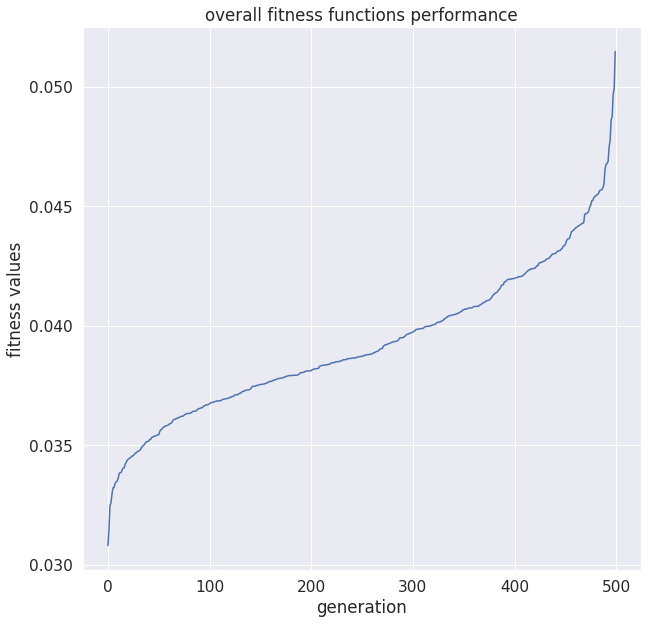

In [388]:
data = sorted(list(test.gens['statistics']['max'].values()))
fig = plt.figure(figsize=(10,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('overall fitness functions performance')

Text(0.5, 1.0, 'search space')

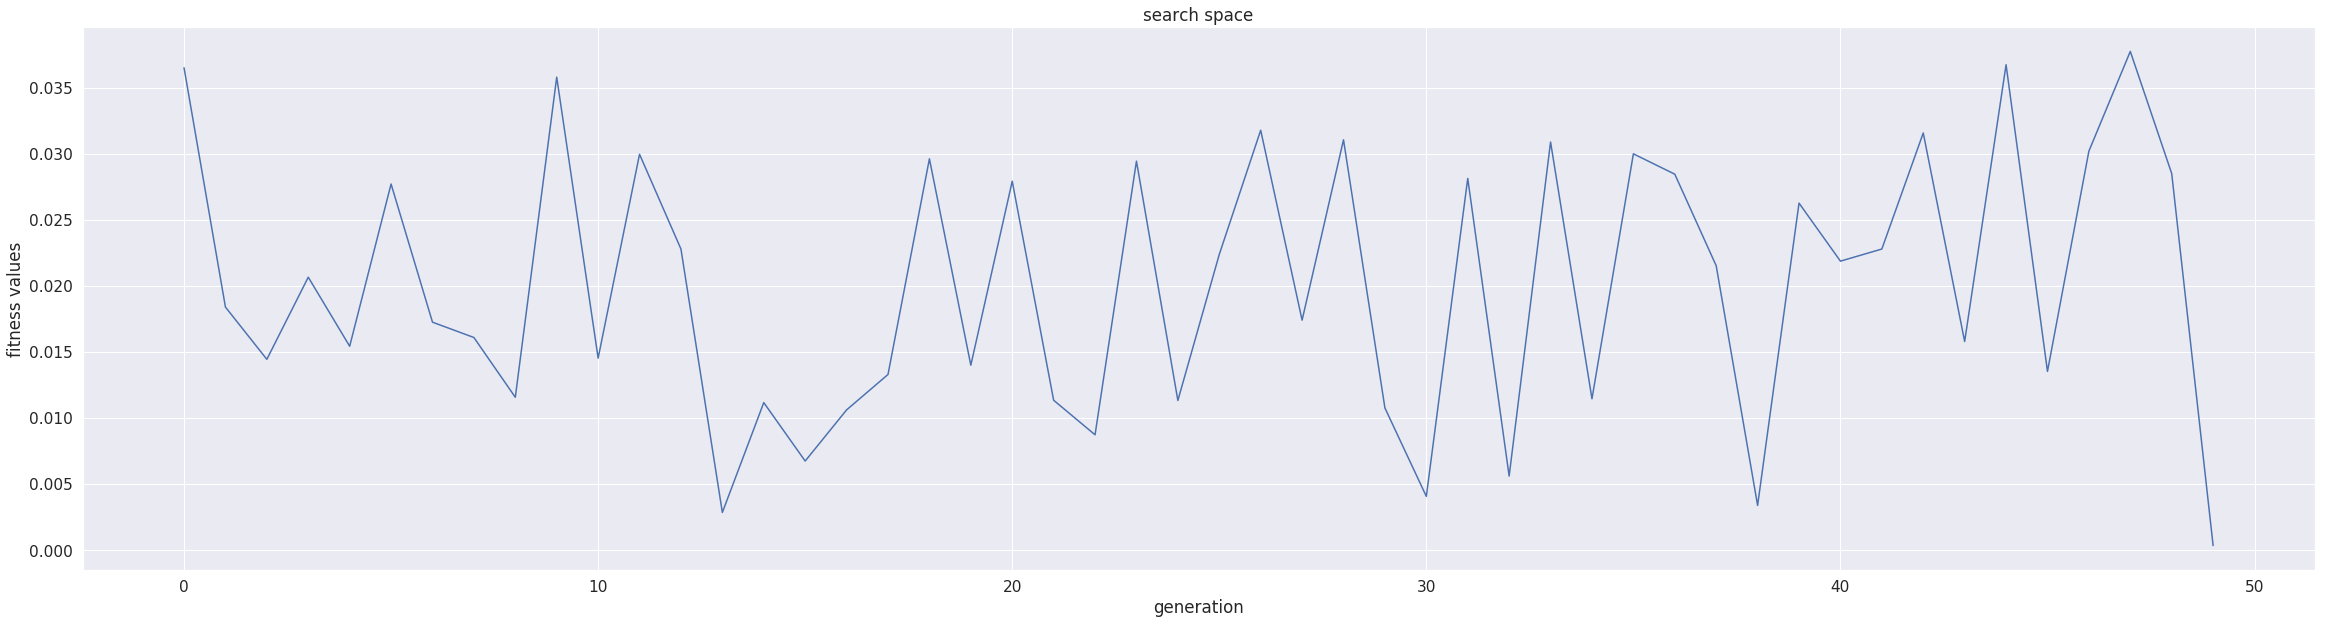

In [389]:
data = pd.DataFrame(fit)
fig = plt.figure(figsize=(40,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('search space')

In [390]:
#for pop 20 gen 100
# from Algorithm_Class import Genetic_Algorithm
gen = 100
test = Genetic_Algorithm(Npop=20, Nchrom = 15, PC = 0.7, PM = 0.01)
test_case = test.train(gen)
chrom, phen,fit, total = get_algo_det(test, gen=gen)
print(f'chromosome = {test.decode(np.array([[int(phen.max())]]))} , phenotype = {phen.max()}')

chromosome = [[1 1 1 1 1 1 0 1 1 0 0 1 0 1 0]] , phenotype = 32458.0


In [391]:
chrom, phen,fit, total = get_algo_det(test, gen=1)
chrom

array([[1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.],
       [1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.],
       [1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.],
       [1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.],
       [0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.

In [394]:
chrom, phen,fit, total = get_algo_det(test, gen=100)
chrom

array([[1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0.

Text(0.5, 1.0, 'overall fitness functions performance')

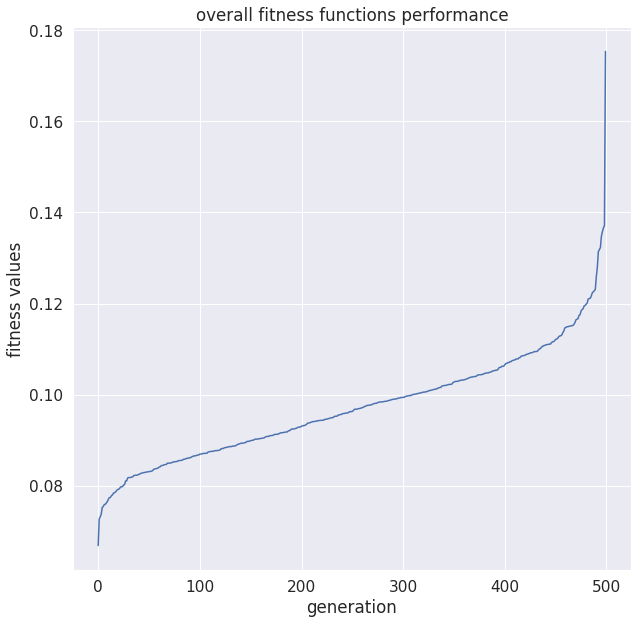

In [404]:
data = sorted(list(test.gens['statistics']['max'].values()))
fig = plt.figure(figsize=(10,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('overall fitness functions performance')

Text(0.5, 1.0, 'search space')

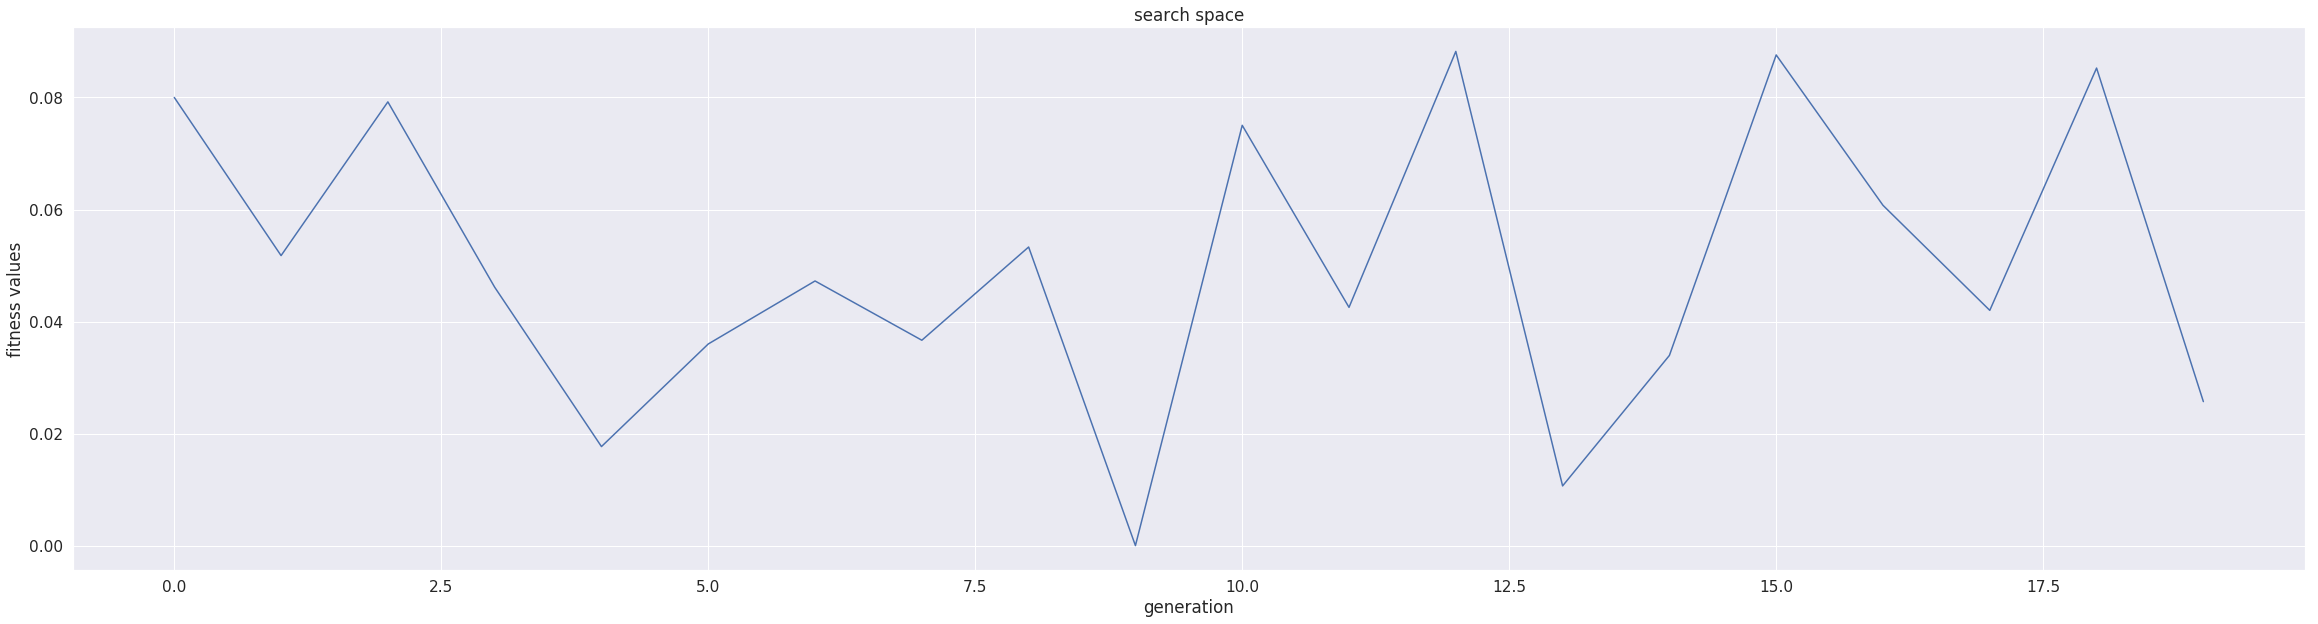

In [396]:
data = pd.DataFrame(fit)
fig = plt.figure(figsize=(40,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('search space')

In [397]:
#for pop 20 gen 300
# from Algorithm_Class import Genetic_Algorithm
gen = 300
test = Genetic_Algorithm(Npop=20, Nchrom = 15, PC = 0.7, PM = 0.01)
test_case = test.train(gen)
chrom, phen,fit, total = get_algo_det(test, gen=gen)
print(f'chromosome = {test.decode(np.array([[int(phen.max())]]))} , phenotype = {phen.max()}')

chromosome = [[1 1 1 1 0 0 1 0 1 1 0 1 0 0 0]] , phenotype = 31080.0


In [398]:
chrom, phen,fit, total = get_algo_det(test, gen=1)
chrom

array([[1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.],
       [1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1.

In [399]:
chrom, phen,fit, total = get_algo_det(test, gen=300)
chrom

array([[1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.],
       [0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.],
       [0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.],
       [1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 1., 1., 0.

Text(0.5, 1.0, 'overall fitness functions performance')

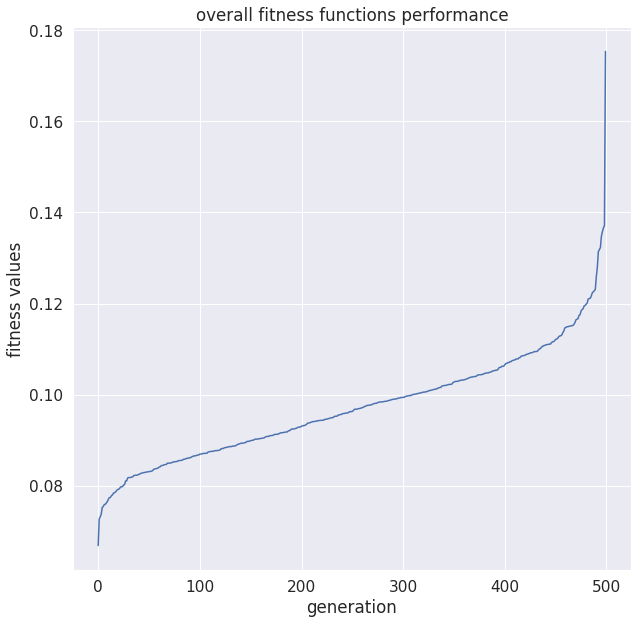

In [405]:
data = sorted(list(test.gens['statistics']['max'].values()))
fig = plt.figure(figsize=(10,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('overall fitness functions performance')

Text(0.5, 1.0, 'search space')

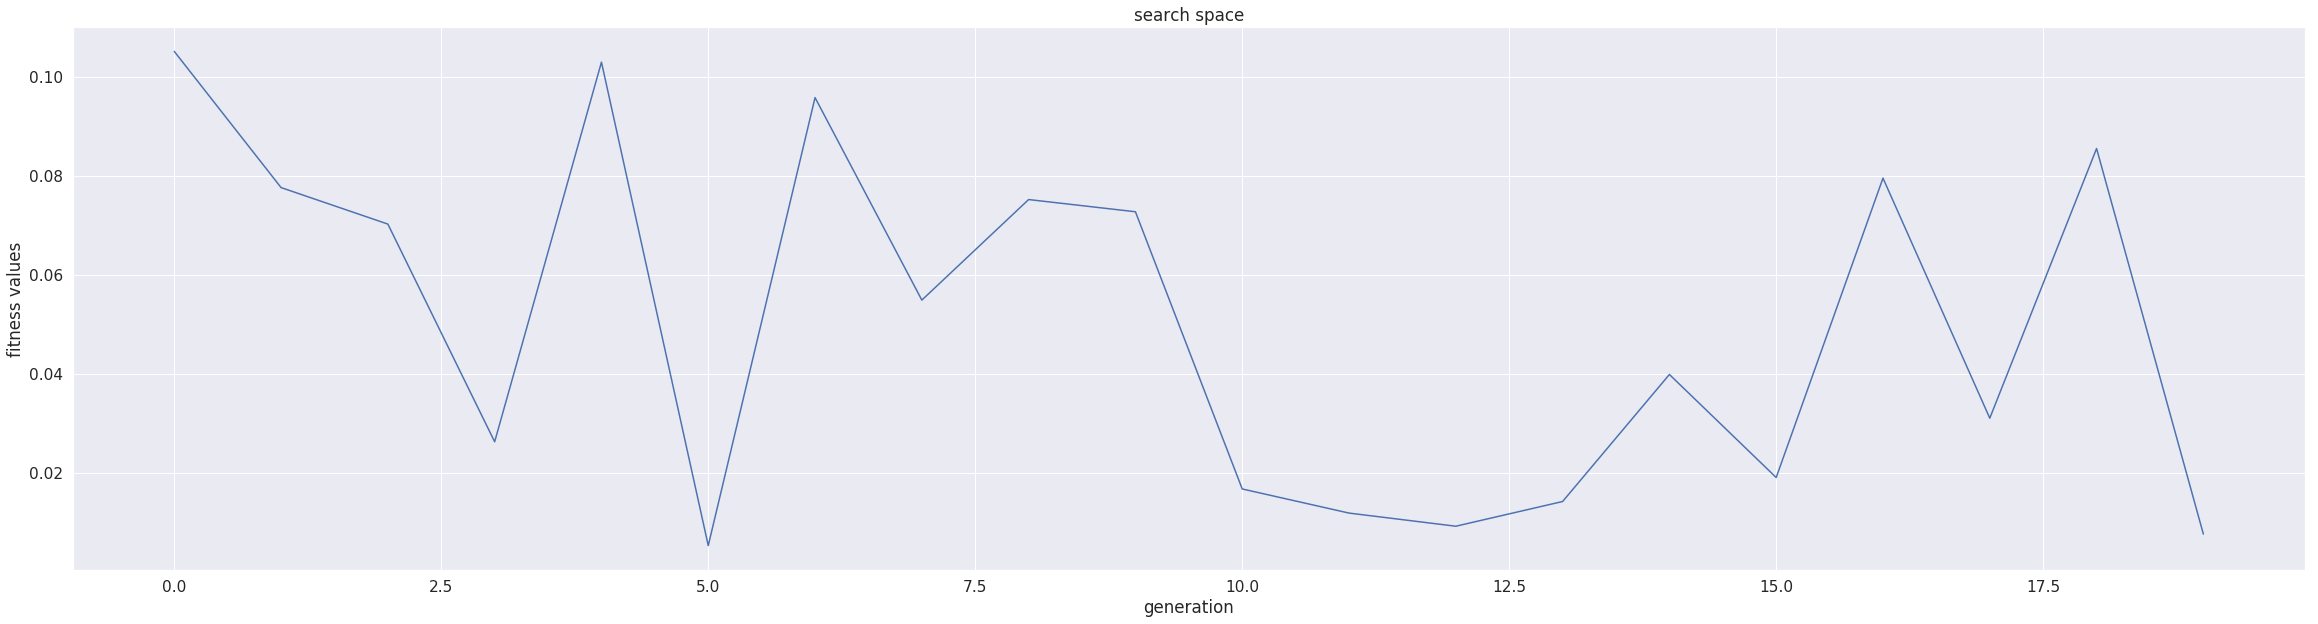

In [401]:
data = pd.DataFrame(fit)
fig = plt.figure(figsize=(40,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('search space')

In [402]:
#for pop 20 gen 500
# from Algorithm_Class import Genetic_Algorithm
gen = 500
test = Genetic_Algorithm(Npop=20, Nchrom = 15, PC = 0.7, PM = 0.01)
test_case = test.train(gen)
chrom, phen,fit, total = get_algo_det(test, gen=gen)
print(f'chromosome = {test.decode(np.array([[int(phen.max())]]))} , phenotype = {phen.max()}')

chromosome = [[1 1 0 1 0 0 1 0 1 1 1 1 1 0 0]] , phenotype = 27004.0


Text(0.5, 1.0, 'overall fitness functions performance')

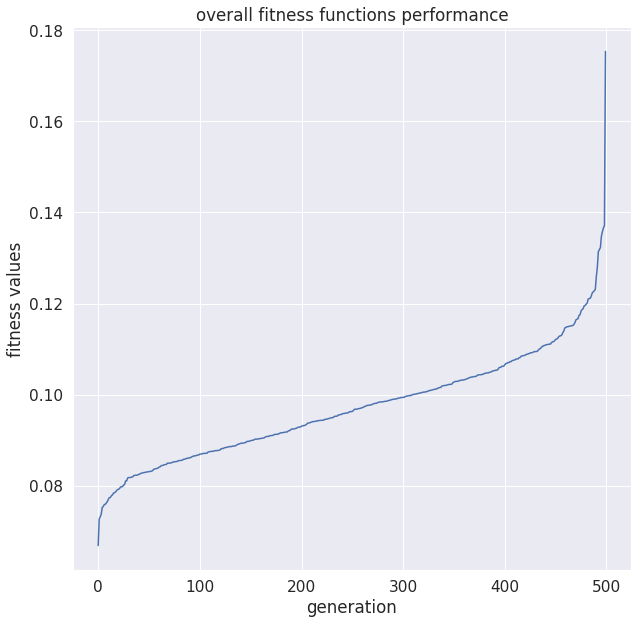

In [406]:
data = sorted(list(test.gens['statistics']['max'].values()))
fig = plt.figure(figsize=(10,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('overall fitness functions performance')

Text(0.5, 1.0, 'search space')

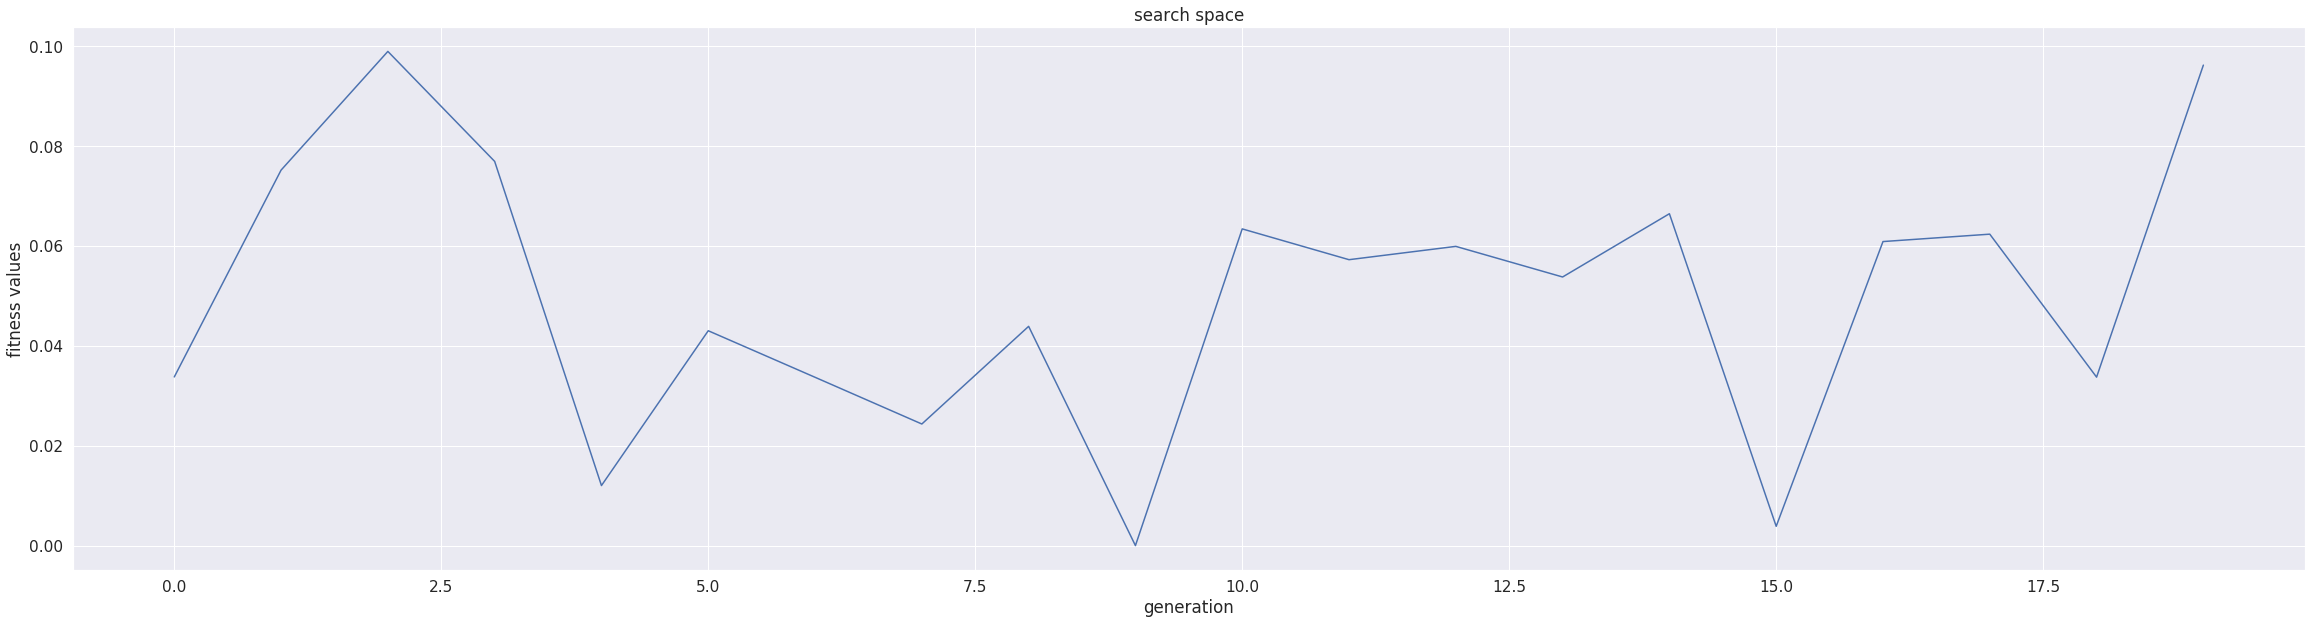

In [403]:
data = pd.DataFrame(fit)
fig = plt.figure(figsize=(40,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('search space')

In [0]:
chrom, phen,fit, total = get_algo_det(test, gen=500)

In [0]:
print(f'chromosome = {test.decode(np.array([[int(phen.max())]]))} , phenotype = {phen.max()}')

chromosome = [[1 1 1 1 1 1 1 1 0 1 1 0 0 1 1]] , phenotype = 32691.0


Text(0.5, 1.0, 'search space')

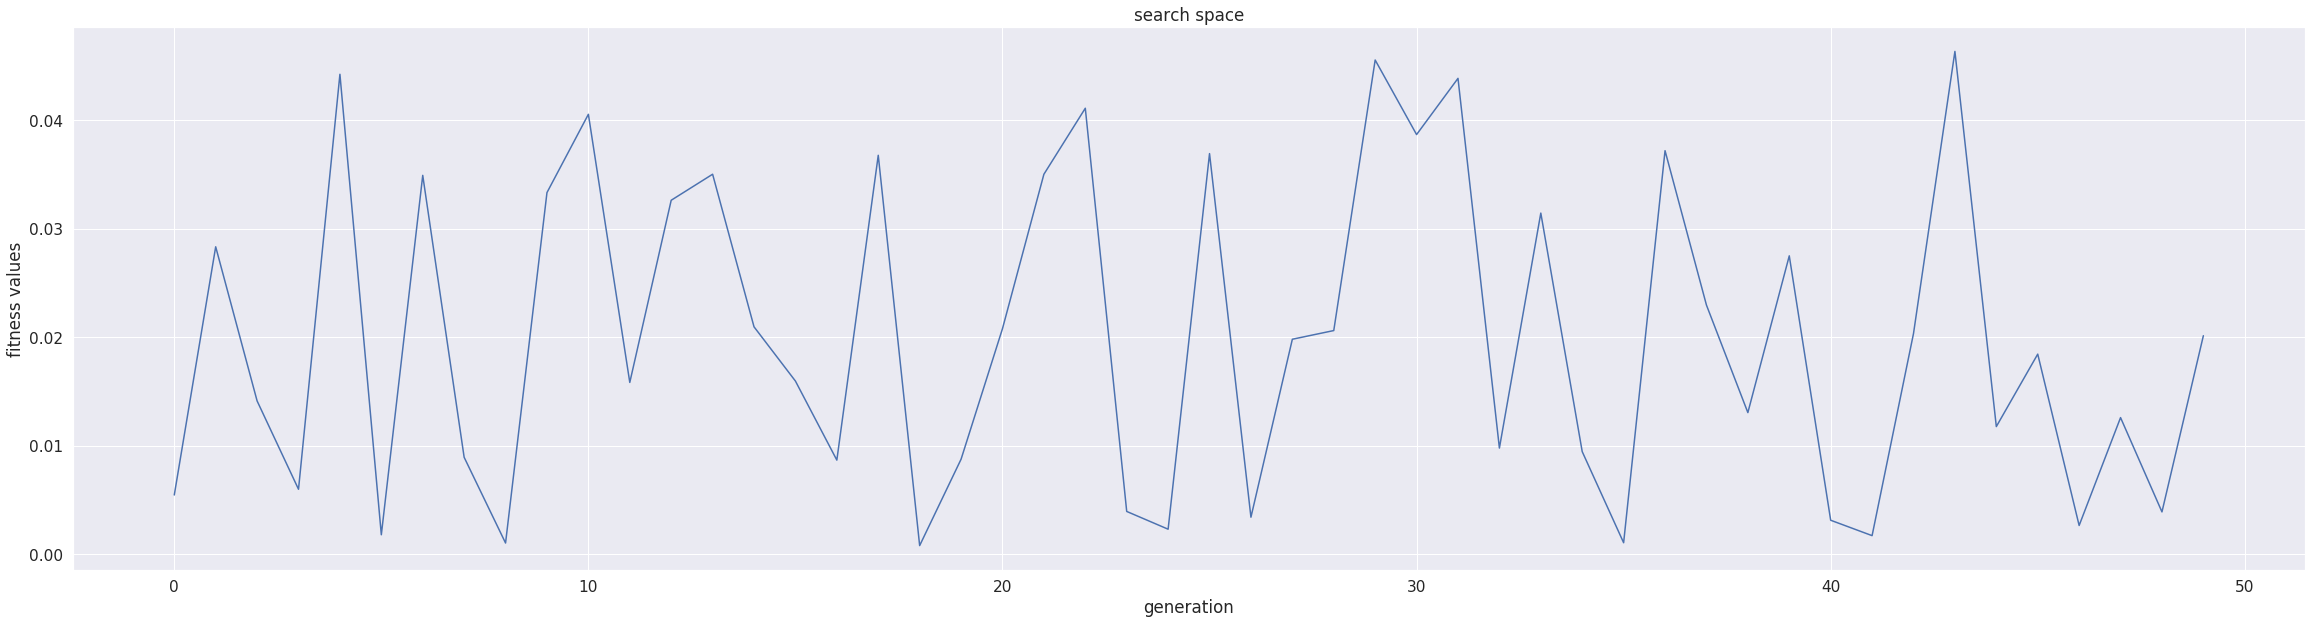

In [359]:
data = pd.DataFrame(fit)
fig = plt.figure(figsize=(40,10))
plt.plot(data)
plt.ylabel('fitness values')
plt.xlabel('generation')
plt.title('search space')

In [0]:
sum(phen)/50

15682.16

In [0]:
1/50

0.02

In [0]:
fit

array([0.01109983, 0.01918745, 0.00944064, 0.03556215, 0.00113069,
       0.0381475 , 0.04156752, 0.03995025, 0.02713659, 0.00093631,
       0.00086263, 0.01250113, 0.00556961, 0.03680972, 0.00041543,
       0.02731573, 0.02669448, 0.00816639, 0.03991849, 0.00145465,
       0.00453801, 0.023075  , 0.00728978, 0.00859325, 0.02394271,
       0.03498283, 0.00905697, 0.04082558, 0.03794423, 0.0368796 ,
       0.03954244, 0.01214159, 0.03466014, 0.00659993, 0.01494672,
       0.00946351, 0.0139164 , 0.04105553, 0.02438101, 0.01348064,
       0.01851666, 0.00628614, 0.01251764, 0.00297156, 0.02392365,
       0.02027749, 0.03605254, 0.01999037, 0.02606307, 0.01221782])

chrom

In [0]:
chrom

(array([[1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.],
        [0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.],
        [0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.],
        [0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.],
        [0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
        [0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.],
        [1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.],
        [1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.],
        [0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
        [1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.],
        [0., 0., 1.,

In [0]:
test.pop

array([[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0,

In [0]:
get_algo_det(test, gen=1)

(array([[1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.],
        [1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.],
        [0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.],
        [1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.],
        [1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.],
        [0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.],
        [1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.],
        [1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.],
        [0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.],
        [1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.],
        [1., 0., 1.,

In [0]:
get_algo_det(test, gen=2)

(array([[0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.],
        [1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.],
        [0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.],
        [1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
        [1., 1., 0.,

In [0]:
get_algo_det(test, gen=3)

(array([[1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.],
        [0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.],
        [1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.],
        [0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.],
        [1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.],
        [1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.],
        [1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.],
        [1., 1., 1.,

In [0]:
get_algo_det(test, gen=4)

(array([[1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.],
        [0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.],
        [1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.],
        [1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.],
        [1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.],
        [0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.],
        [0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.],
        [1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.],
        [0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.],
        [0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1.,

In [0]:
get_algo_det(test, gen=5)

(array([[1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.],
        [0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.],
        [1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.],
        [0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.],
        [1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.],
        [1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
        [1., 1., 0.,

In [0]:
get_algo_det(test, gen=6)

(array([[0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.],
        [0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
        [0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.],
        [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
        [0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
        [1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.],
        [0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.],
        [1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.],
        [0., 1., 1.,

In [0]:
get_algo_det(test, gen=7)

(array([[1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.],
        [0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.],
        [0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.],
        [0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.],
        [0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.],
        [1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.],
        [0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.],
        [1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
        [1., 1., 1.,

In [0]:
get_algo_det(test, gen=8)

(array([[1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
        [1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
        [1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.],
        [0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1.],
        [1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.],
        [1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.],
        [0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.],
        [0., 0., 1.,

In [0]:
get_algo_det(test, gen=9)

(array([[0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.],
        [0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
        [1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
        [0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.],
        [0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.],
        [1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.],
        [1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
        [1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.],
        [1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 0., 1.,

In [0]:
get_algo_det(test, gen=10)

(array([[1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.],
        [0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
        [0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.],
        [0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
        [1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.],
        [0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.],
        [0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.],
        [0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
        [0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.],
        [0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
        [1., 0., 0.,

# Neural Network

In [0]:
#import libraries
#importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import StratifiedShuffleSplit


#importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import keras
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import StratifiedShuffleSplit
from keras.initializers import RandomUniform


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import torch as tch
from torchvision import models#, datasets, transforms
from torch import nn, optim
from collections import OrderedDict
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,roc_curve,roc_auc_score
%matplotlib inline

In [5]:
# Importing dataset
dataset = pd.read_excel('dataset.xlsx')
dataset.head()

,english,subj2,subj3,subj4,utme,jamb,Output
0,0.606557,0.366197,0.407407,0.246377,0.060606,0.057554,0
1,0.655738,0.394366,0.351852,0.463768,0.030303,0.179856,0
2,0.672131,0.380282,0.500000,0.550725,0.000000,0.280576,0
3,0.786885,0.732394,0.685185,0.681159,0.121212,0.647482,1
4,0.655738,0.690141,0.555556,0.869565,0.484848,0.611511,1


In [0]:
data = dataset.copy()
y = data.Output
data.drop(labels='Output', axis=1, inplace=True)
cols = data.columns
X = data.copy().values

In [0]:
#splitting dataset into train,remaining
split = StratifiedShuffleSplit(test_size=0.4)

for trn_idx, rem_idx in split.split(X,y):
    x_trn, x_rem = X[trn_idx], X[rem_idx]
    y_trn, y_rem = y[trn_idx], y[rem_idx]

In [0]:
#splitting dataset into test,validate
split = StratifiedShuffleSplit(test_size=0.5)

for tst_idx, val_idx in split.split(x_rem,y_rem):
    x_val, x_tst = X[val_idx], X[tst_idx]
    y_val, y_tst = y[val_idx], y[tst_idx]

In [317]:
x_trn.shape

(1200, 6)

In [318]:
x_val.shape

(400, 6)

In [319]:
x_tst.shape

(400, 6)

# Train model with Pytorch

In [0]:
train_target = tch.tensor(y_trn.values)
train =        tch.tensor(x_trn.astype(np.float32)) 

test_target =  tch.tensor(y_tst.values)
test =         tch.tensor(x_tst.astype(np.float32))

val_target =  tch.tensor(y_val.values)
val =         tch.tensor(x_val.astype(np.float32))

### Model Class

In [0]:
class train_model:
  
  def __init__(self,model = None, lr=0.01):
    self.model = model
    self.criterion = None
    self.optimizer = None
    self.weights = None
    self.y_scores_train = []
    self.y_scores_test = []
   # self.valid_loader = te
   # self.train_loader = testset
    #self.batch = batch
    #self.epochs = epochs
    self.train_loss = []
    self.test_loss = []
    self.train_acc = []
    self.test_acc = []
    self.train_rec = []
    self.test_rec = []
    self.train_f1_scr = []
    self.test_f1_scr = []
    self.train_pre = []
    self.test_pre = []
    self.t_epch = 0
    #self.save_on_train = save_on_train
    
  def train(self,model = None,train_loader=None, valid_loader=None,criterion=None,optimizer=None,epochs=50,batch_size=30):
    
    valid_rec_min = 0.0
    train_on_gpu = True #tch.cuda.is_available()
    new_state = model.state_dict()
    self.t_epch += epochs
    for epoch in range(epochs):
      # keep track of training and validation loss and scores
        train_loss    = 0.0
        test_loss    = 0.0
        train_acc     = 0.0
        train_pre     = 0.0
        train_rec     = 0.0
        train_f1_scr  = 0.0
        test_acc      = 0.0
        test_pre      = 0.0
        test_rec      = 0.0
        test_f1_scr   = 0.0
      
      ###################
      # train the model #
      ###################
        model.cuda()
        for data, target in train_loader:
       
          # move tensors to GPU if CUDA is available
            if train_on_gpu: 
                model.train()
                data, target = data.cuda(), target.cuda()
            else:
                model.cpu()
                model.train()
                data, target = data.cpu(), target.cpu()
     
          # clear the gradients of all optimized variables
            optimizer.zero_grad()
     
          # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
     
          # calculate the batch loss
            loss = criterion(output, target)                   
      
          # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
      
          # perform a single optimization step (parameter update)
            optimizer.step()
       
          # update training loss
            train_loss     +=  loss.item()*data.size(0)
            train_acc      +=  accuracy_score(target.cpu(), output.cpu().topk(1)[1])
            train_pre      +=  precision_score(target.cpu(), output.cpu().topk(1)[1])
            train_rec      +=  recall_score(target.cpu(), output.cpu().topk(1)[1])
            train_f1_scr   +=  f1_score(target.cpu(), output.cpu().topk(1)[1])
  
        
      ######################    
      # validate the model #
      ######################
        model.eval()
     
        for data, target in valid_loader:
      
          # move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
       
          # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
          
          # calculate the batch loss
            loss = criterion(output, target)
                    
          # update average validation loss 
            test_loss     += loss.item()*data.size(0)
            test_acc       += accuracy_score(target.cpu(), output.cpu().topk(1)[1])
            test_pre       += precision_score(target.cpu(), output.cpu().topk(1)[1])
            test_rec       +=  recall_score(target.cpu(), output.cpu().topk(1)[1])
            test_f1_scr    +=  f1_score(target.cpu(), output.cpu().topk(1)[1])
            
                
      # calculate average losses and scores
        train_loss = train_loss/round(len(train_loader.dataset)/batch_size)
        test_loss = test_loss/round(len(valid_loader.dataset)/batch_size)
      
        train_acc       =   1 if  train_acc/round(len(train_loader.dataset)/batch_size) > 1 else train_acc/round(len(train_loader.dataset)/batch_size)

        train_pre       =   1 if train_pre/round(len(train_loader.dataset)/batch_size) > 1 else train_pre/round(len(train_loader.dataset)/batch_size)

        train_rec       =   1 if train_rec/round(len(train_loader.dataset)/batch_size) > 1 else train_rec/round(len(train_loader.dataset)/batch_size)
                                     
        train_f1_scr    =   1 if train_f1_scr/round(len(train_loader.dataset)/batch_size) > 1 else train_f1_scr/round(len(train_loader.dataset)/batch_size)

        test_acc        =   1 if test_acc/round(len(valid_loader.dataset)/batch_size) > 1 else test_acc/round(len(valid_loader.dataset)/batch_size)

        test_pre        =   1 if test_pre/round(len(valid_loader.dataset)/batch_size) > 1 else test_pre/round(len(valid_loader.dataset)/batch_size)
  
        test_rec        =   1 if test_rec/round(len(valid_loader.dataset)/batch_size,5) > 1 else test_rec/round(len(valid_loader.dataset)/batch_size,5)

        test_f1_scr    =   1 if test_f1_scr/round(len(valid_loader.dataset)/batch_size,5) > 1 else test_f1_scr/round(len(valid_loader.dataset)/batch_size,5) 

      

            
      #append train scores
        self.train_loss.append(train_loss)
        self.train_acc.append(train_acc)
        self.train_rec.append(train_rec)
        self.train_f1_scr.append(train_f1_scr)
        self.train_pre.append(train_pre)
        
      #append test scores
        self.test_loss.append(test_loss)
        self.test_acc.append(test_acc)
        self.test_rec.append(test_rec)
        self.test_f1_scr.append(test_f1_scr)
        self.test_pre.append(test_pre)
        
      # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} '.format(epoch, train_loss, test_loss))
      
        print('train Accuracy score : {:.6f} \ttrain Precision Score: {:.6f} \ttrain Recall Score: {:.6f}\ttrain f1 Score: {:.6f}'.format(train_acc, train_pre, train_rec, train_f1_scr))
      
        print('test Accuracy score : {:.6f} \ttest Precision Score: {:.6f} \ttest Recall Score: {:.6f}\ttest f1 Score: {:.6f}'.format(test_acc, test_pre, test_rec, test_f1_scr))
    
      # save model if validation loss has decreased
        if test_rec > valid_rec_min:
            print('test recall increased ({:.6f} --> {:.6f}).  Saving model ...\n\n'.format(valid_rec_min,test_rec))
            self.model = model 
            self.weights = model.state_dict()
            valid_rec_min = test_rec
            
  def predict(self):
    model = tch.load(model)
    model.eval()

### Helper Functino

In [0]:
def plot1(precision, recalls, threshold,title='plot'):
  plt.figure(figsize(10,10))
  plt.plot(thresholds, precisions[:-1], "b--", label="Precison")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.xlabel("Threshold")
  plt.title(title)
  plt.legend(loc="center left")
  plt.ylim([0,1])
  plt.figure(figsize=(40,10))
  
  
  
def plot2(precisions, recalls,title='plot',xlab='recall', ylab='precison'):
    plt.figure(figsize=(70,10))
    cuv = np.linspace(0,1,500)
    sns.lineplot(recalls, precisions)
    sns.lineplot(cuv,cuv)
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title)
    plt.axis([0, 1, 0, 1])
    

def plot3(hidd1=None,hidd2=None,hidd3=None,title='plot'):
  plt.plot(hidd1,label='hidden1')
  plt.plot(hidd2,label='hidden2')
  plt.plot(hidd3,label='hidden3')
  plt.title(title)
  plt.legend()
  
def plot4(one=None, two=None, rang = None, lab1=None, lab2=None,ylab=None, xlab=None, title1=None):
  plt.figure(figsize=(20,30))
  sns.lineplot(rang,one,legend='full')
  sns.lineplot(rang,two,legend='full')
  plt.xlabel(ylab)
  plt.ylabel(xlab)
  plt.legend((lab2,lab1))
  plt.title(title1)
  
def plot5(one=None, two=None, rang = None, lab1=None, lab2=None, title1=None):  
  #plt.figure(figsize=(8,8))
  plt.subplot(1,2,2)
  plt.plot(rang, one, label=lab1)
  plt.plot(rang, two, label=lab2)
  plt.legend(loc='upper right')
  plt.title(title1)
  
def plot(precisions, recalls,title='plot',xlab='recall', ylab='precison'):
    plt.figure(figsize=(10,10))
    cuv = np.linspace(0,1,500)
    sns.lineplot(recalls[0], precisions[0])
    sns.lineplot(recalls[1], precisions[1])
    sns.lineplot(recalls[2], precisions[2])
    sns.lineplot(cuv,cuv)
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title)
    plt.axis([0, 1, 0, 1])

### Model 1

In [0]:
_1_hidlay = nn.Sequential(OrderedDict([ 
                                    ("input",       nn.Linear(6, 13)),
                                    ("activ 1",     nn.ReLU()),
                                    ("hidden 1 ",   nn.Linear(13,10)),
                                    ('activ 2',     nn.ReLU()),
                                    ("hidden 2 ",   nn.Linear(10,8)),
                                    ('activ 3',     nn.ReLU()),
                                    ("hidden 3 ",   nn.Linear(8,2)),
                                    ("sig_out",     nn.Sigmoid())
                                ]))

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(_1_hidlay.parameters(), lr=0.01)

In [0]:
batch_size = 32

In [0]:
train_tensor = tch.utils.data.TensorDataset(train, train_target) 
train_loader = tch.utils.data.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True)
       
val_tensor =  tch.utils.data.TensorDataset(val, val_target) 
val_loader =  tch.utils.data.DataLoader(dataset = val_tensor, batch_size = batch_size, shuffle = True)

In [119]:
for i,j in train_loader:
  print(i.shape)
  break

torch.Size([32, 6])


In [120]:
_1_hidtrain = train_model()
_1_hidtrain.train(model=_1_hidlay,train_loader=train_loader,valid_loader=val_loader,criterion=criterion,optimizer=optimizer1,epochs=500)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch: 0 	Training Loss: 20.991772 	Validation Loss: 21.068346 
train Accuracy score : 0.360594 	train Precision Score: 0.000000 	train Recall Score: 0.000000	train f1 Score: 0.000000
test Accuracy score : 0.407292 	test Precision Score: 0.000000 	test Recall Score: 0.000000	test f1 Score: 0.000000
Epoch: 1 	Training Loss: 20.957995 	Validation Loss: 21.040149 
train Accuracy score : 0.361480 	train Precision Score: 0.000000 	train Recall Score: 0.000000	train f1 Score: 0.000000
test Accuracy score : 0.417708 	test Precision Score: 0.000000 	test Recall Score: 0.000000	test f1 Score: 0.000000
Epoch: 2 	Training Loss: 20.925569 	Validation Loss: 21.013274 
train Accuracy score : 0.361480 	train Precision Score: 0.000000 	train Recall Score: 0.000000	train f1 Score: 0.000000
test Accuracy score : 0.402083 	test Precision Score: 0.000000 	test Recall Score: 0.000000	test f1 Score: 0.000000
Epoch: 3 	Training Loss: 20.895016 	Validation Loss: 20.988342 
train Accuracy score : 0.362145 	tra

##### Accuracy

In [237]:
_1_hidtrain.model.cpu().eval()
output_trn = _1_hidtrain.model(train).cpu().topk(1)[1]
acc_scor = accuracy_score(output_trn, train_target)
print(f'training accuracy : {acc_scor}')

training accuracy : 0.9914285714285714


In [238]:
_1_hidtrain.model.cpu().eval()
output_val = _1_hidtrain.model(val).cpu().topk(1)[1]
acc_scor = accuracy_score(output_val, val_target)
print(f'validation accuracy : {acc_scor}')

validation accuracy : 0.9933333333333333


In [239]:
_1_hidtrain.model.cpu().eval()
output_tst = _1_hidtrain.model(test).cpu().topk(1)[1]
acc_scor = accuracy_score(output_tst, test_target)
print(f'test accuracy : {acc_scor}')

test accuracy : 0.9966666666666667


#### Sensitivity

In [240]:
c_m_tst = confusion_matrix(output_tst, test_target)
c_m_trn = confusion_matrix(output_trn, train_target)

c_m_tst = confusion_matrix(output_tst, test_target)
sen = c_m_tst[0][0]/(c_m_tst[0][0] + c_m_tst[1][0])
sen

0.992

#### specificity

In [189]:
spe = 1-sen
spe

0.008000000000000007

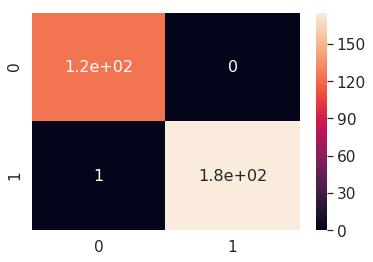

In [205]:


sns.set(font_scale=1.4)#for label size
sns.heatmap(c_m_tst, annot=True,annot_kws={"size": 16})



##### f score

###### test f score

In [191]:
f_score = f1_score(test_target, output_tst)
print(f'f_score_test = {f_score}')

f_score_test = 0.9971509971509972


###### train fscore

In [195]:
f_score = f1_score(train_target, output_trn)
print(f'f_score_train = {f_score}')

f_score_train = 0.9930069930069931


#### confusion matrix

In [193]:
c_m

array([[124,   0],
       [  1, 175]])

#### Prevalence

In [203]:
print(f'prevalence_test : {(c_m_tst[0][0]+c_m_tst[1][0])/(sum(c_m_tst[:])[0]+sum(c_m_tst[:])[1])}')

prevalence_test : 0.4166666666666667


In [206]:
print(f'prevalence_train : {(c_m_trn[0][0]+c_m_trn[1][0])/(sum(c_m_trn[:])[0]+sum(c_m_trn[:])[1])}')

prevalence_train : 0.38571428571428573


#### Precision

In [183]:
print(f'precision_test = {precision_score(output, test_target)}')

precision_test = 1.0


##### MSE_loss

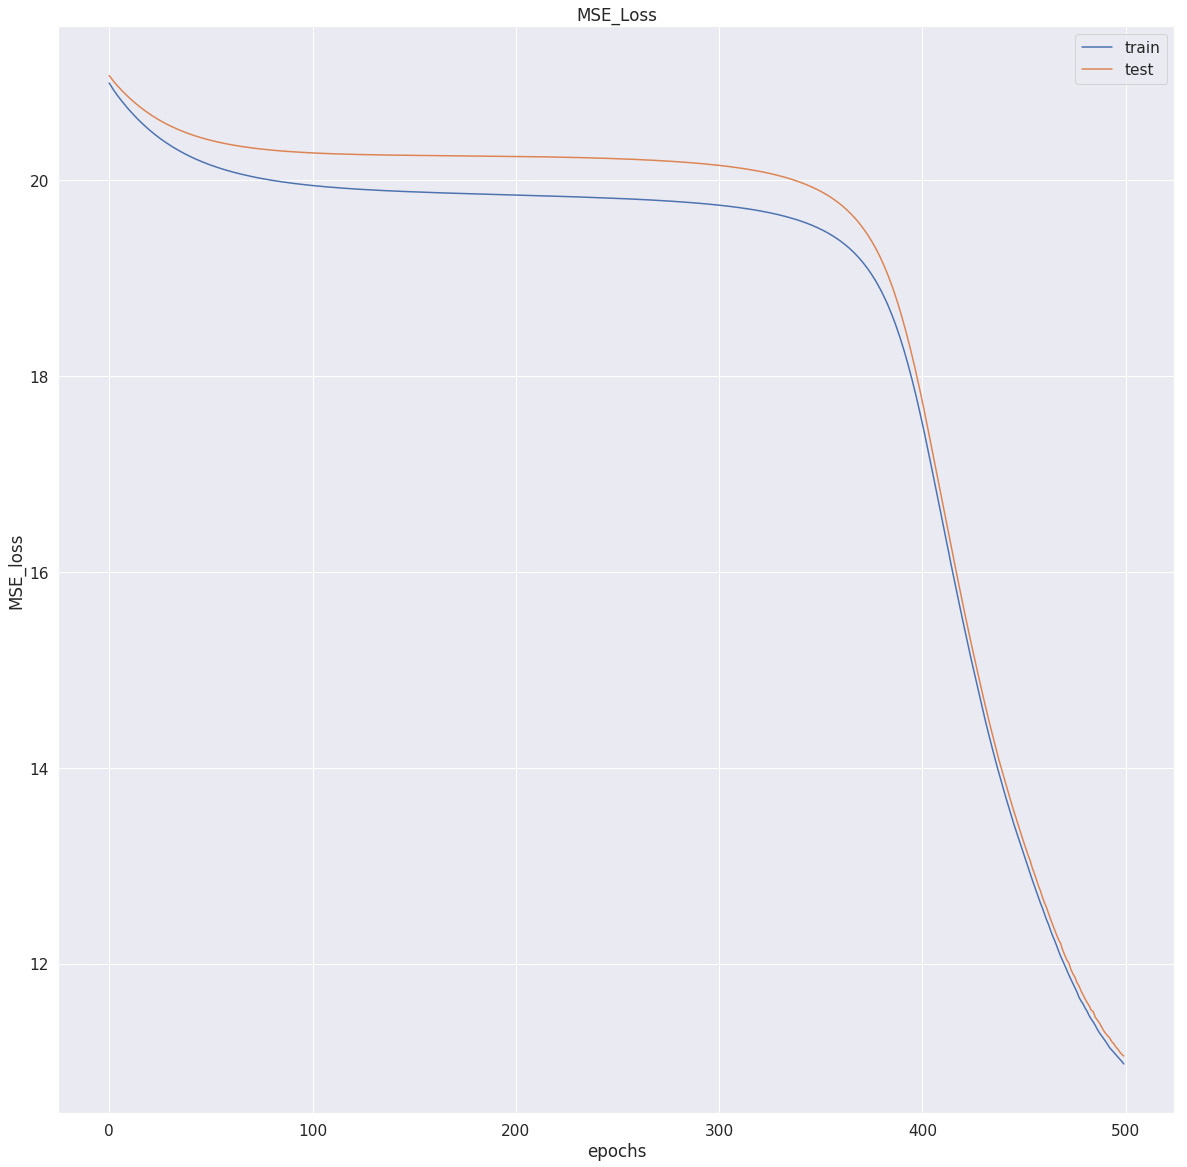

In [161]:
epochs_rang = range(500)
MSE_trainloss = _1_hidtrain.train_loss
MSE_testloss  = _1_hidtrain.test_loss

plot4(MSE_trainloss, MSE_testloss, epochs_rang, 'test','train','epochs','MSE_loss','MSE_Loss')

#### Convergence rate

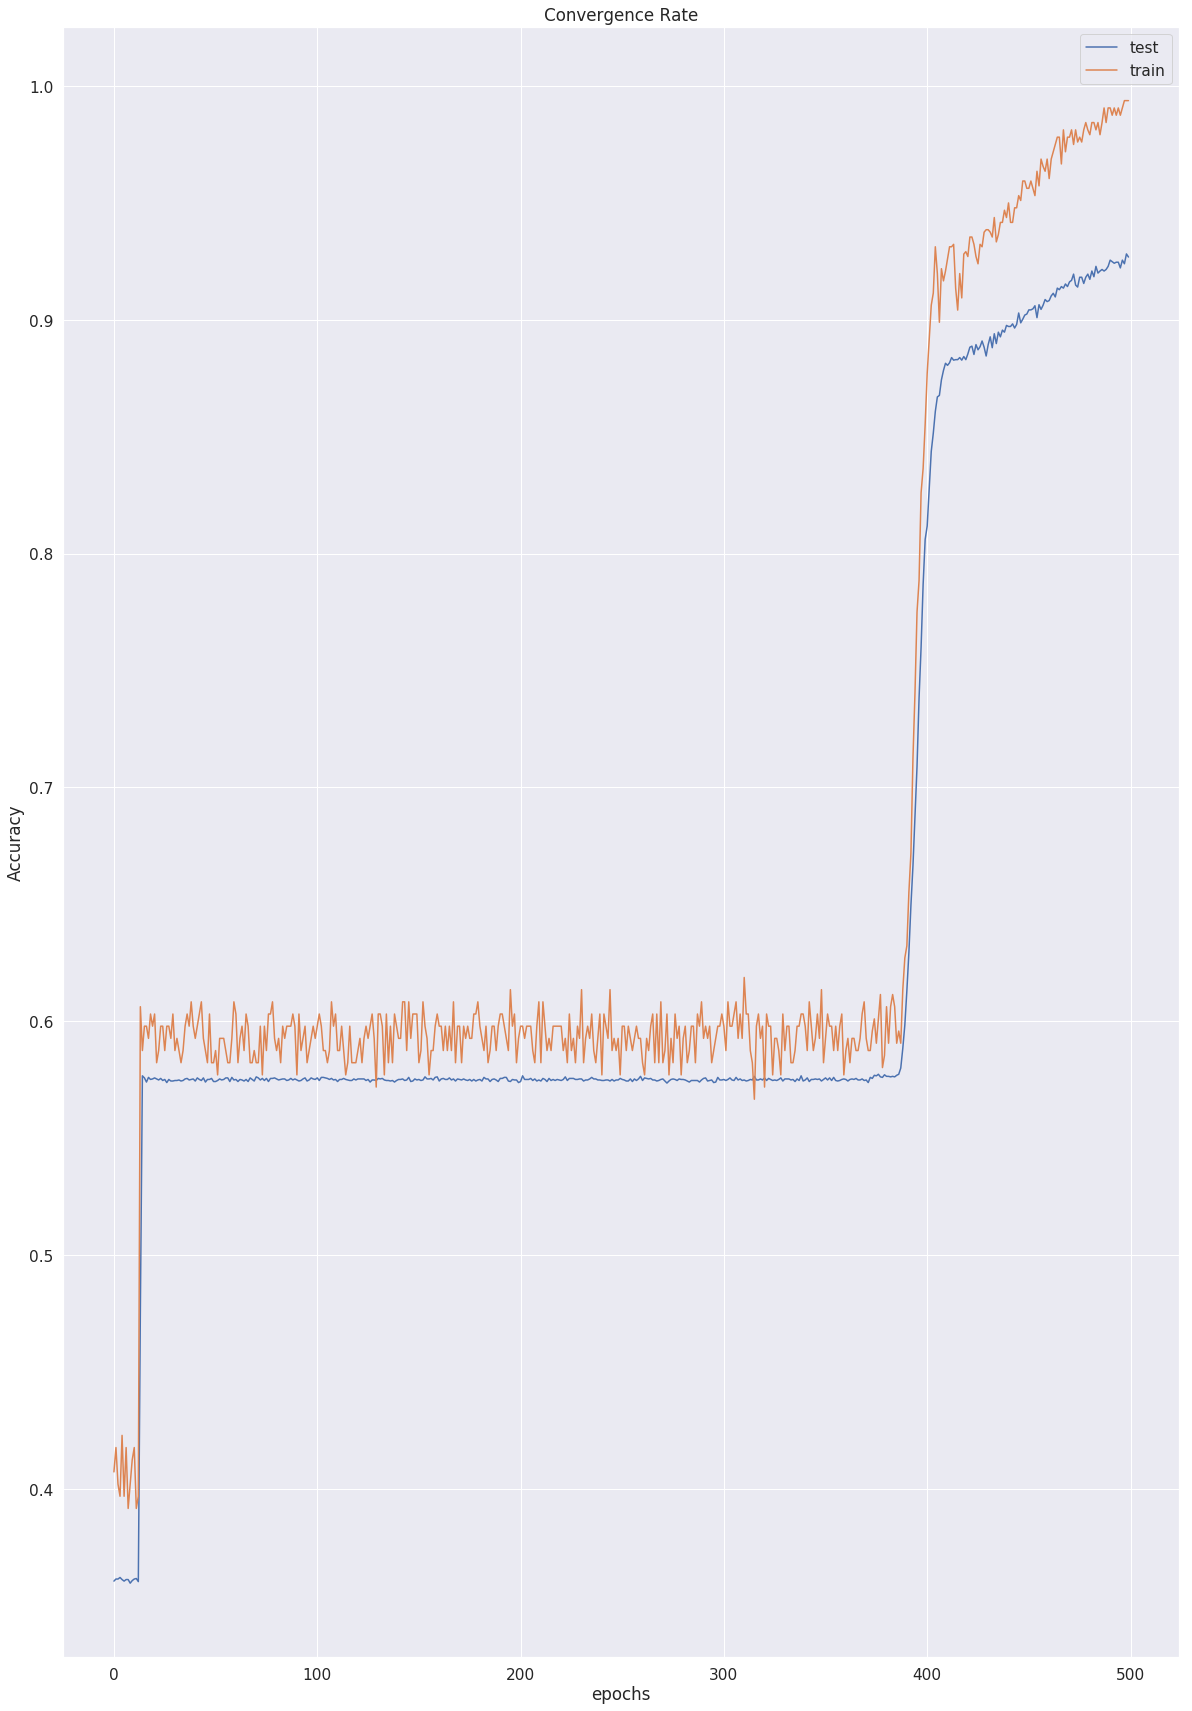

In [164]:
epochs_rang = range(500)
acc_train = _1_hidtrain.train_acc
acc_test  = _1_hidtrain.test_acc

plot4(acc_train, acc_test, epochs_rang, 'train', 'test','epochs','Accuracy','Convergence Rate')

#### Roc Curve

##### training

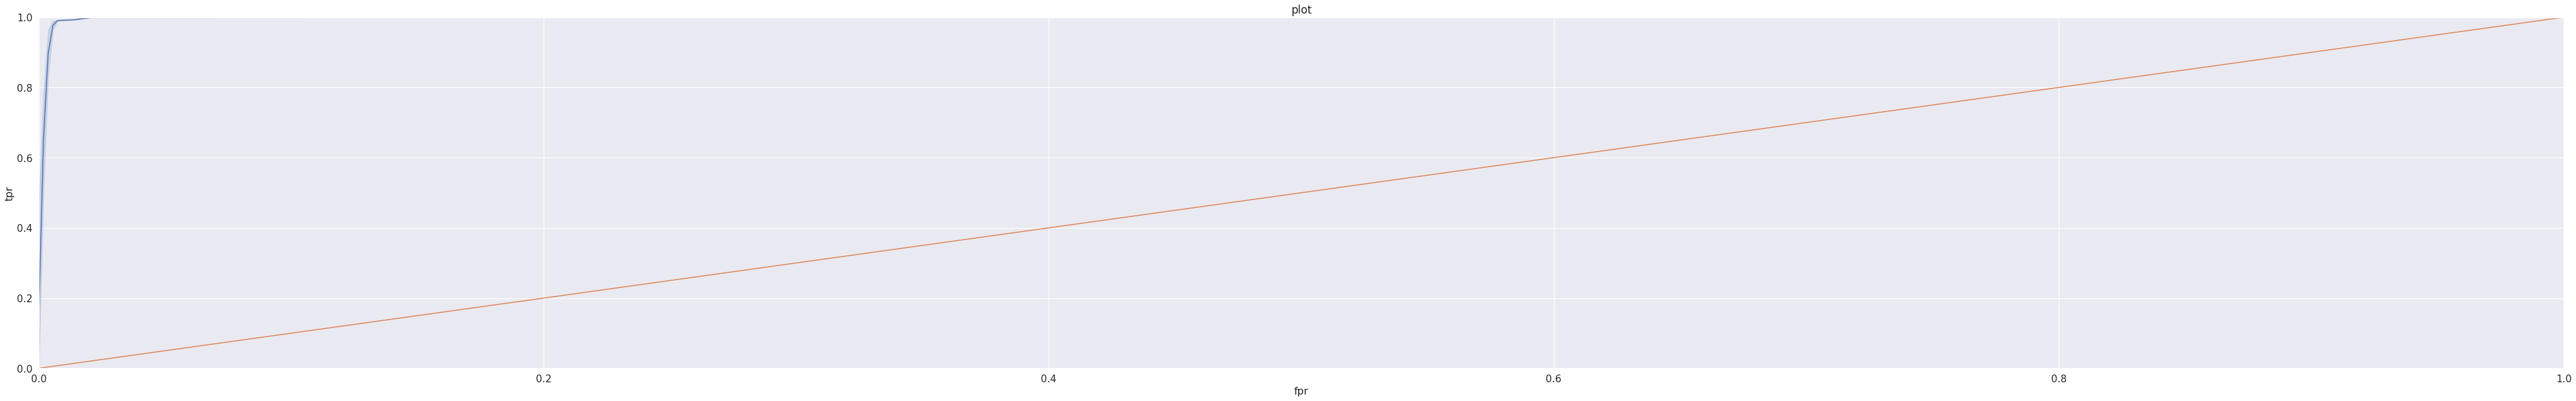

In [173]:
_1_hidtrain.model.cpu().eval()
output = _1_hidtrain.model(train).cpu().topk(1)[1]
out_scr = _1_hidtrain.model(train).cpu()[:,1].detach().numpy()

tpr, fpr, thres = roc_curve(train_target,out_scr)

plot2(fpr,tpr,xlab='fpr', ylab='tpr')

##### testing

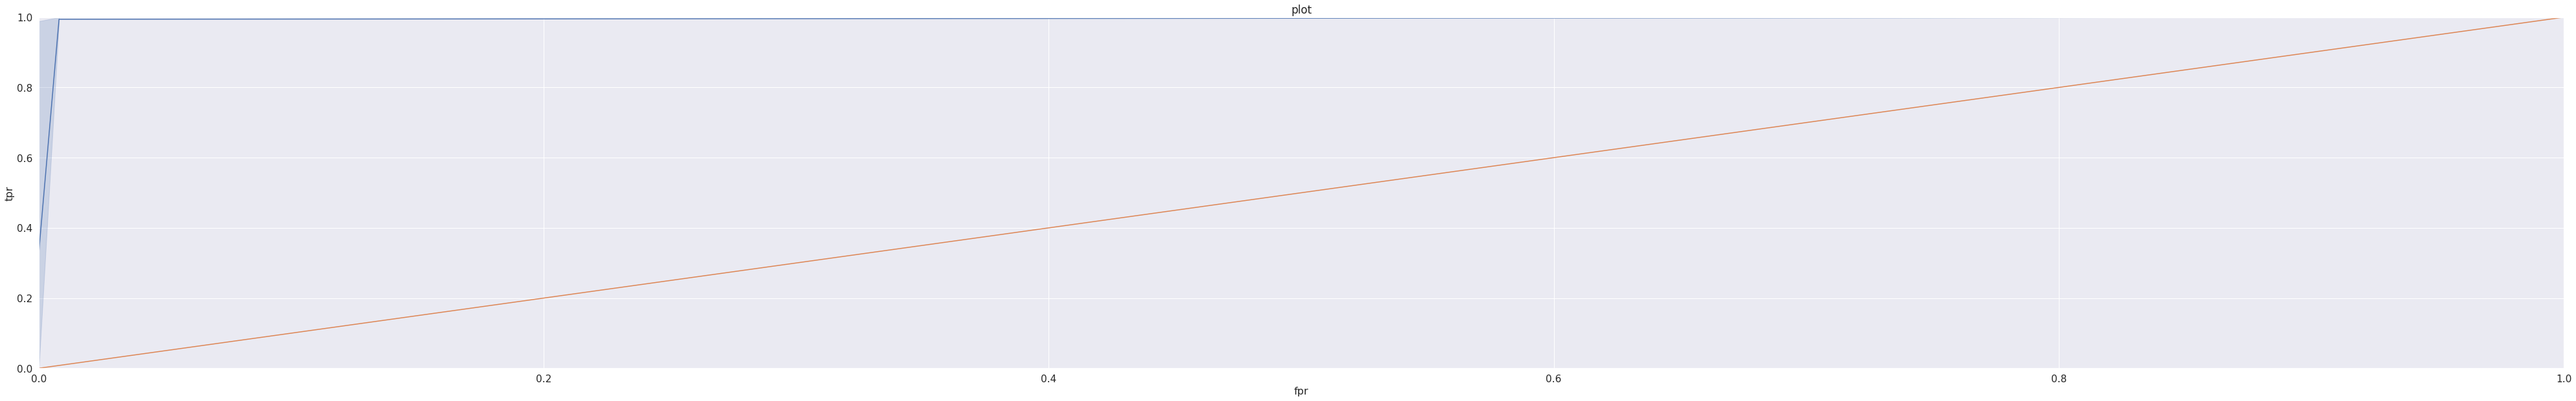

In [174]:
_1_hidtrain.model.cpu().eval()
output = _1_hidtrain.model(test).cpu().topk(1)[1]
out_scr = _1_hidtrain.model(test).cpu()[:,1].detach().numpy()

tpr, fpr, thres = roc_curve(test_target,out_scr)

plot2(fpr,tpr,xlab='fpr', ylab='tpr')

In [123]:
min(_1_hidtrain.train_loss)

10.975198314545002

In [0]:
# _2_hidlay = nn.Sequential(OrderedDict([ 
#                                     ("input",       nn.Linear(6, 13)),
#                                     ("activ 1",     nn.Tanh()),
#                                     ("input",       nn.Linear(13, 10)),
#                                     ("activ 1",     nn.Sigmoid()),                                    
#                                     ("hidden 1 ",   nn.Linear(10,8)),
#                                     ("activ 1",     nn.Tanh()),
#                                     ("hidden 1 ",   nn.Linear(8,2)),
#                                     ("sig_out",     nn.Sigmoid()),
#                                 ]))

In [0]:
# _3_hidlay = nn.Sequential(OrderedDict([ 
#                                     ("input",       nn.Linear(6, 13)),
#                                     ("activ 1",     nn.Sigmoid()),
#                                     ("input",       nn.Linear(13, 10)),
#                                     ("activ 1",     nn.Sigmoid()),                                    
#                                     ("hidden 1 ",   nn.Linear(10,8)),
#                                     ("activ 1",     nn.Tanh()),
#                                     ("hidden 1 ",   nn.Linear(8,2)),
#                                     ("sig_out",     nn.Sigmoid()),
#                                 ]))

### model 2

In [0]:
_2_hidlay = nn.Sequential(OrderedDict([ 
                                    ("input",       nn.Linear(6, 13)),
                                    ("activ 1",     nn.ReLU()),
                                    ("hidden 1 ",   nn.Linear(13,10)),
                                    ('activ 2',     nn.Sigmoid()),
                                    ("hidden 2 ",   nn.Linear(10,8)),
                                    ('activ 3',     nn.ReLU()),
                                    ("hidden 3 ",   nn.Linear(8,2)),
                                    ("sig_out",     nn.Sigmoid())
                                ]))

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(_2_hidlay.parameters(), lr=0.01)

In [0]:
batch_size = y.shape[0]

In [280]:
_2_hidtrain = train_model()
_2_hidtrain.train(model=_2_hidlay,train_loader=train_loader,valid_loader=val_loader,criterion=criterion,optimizer=optimizer2,epochs=500)

Epoch: 0 	Training Loss: 19.980249 	Validation Loss: 19.245769 
train Accuracy score : 0.579599 	train Precision Score: 0.579599 	train Recall Score: 0.943396	train f1 Score: 0.715517
test Accuracy score : 0.593750 	test Precision Score: 0.593750 	test Recall Score: 1.000000	test f1 Score: 0.775414
test recall increased (0.000000 --> 1.000000).  Saving model ...


Epoch: 1 	Training Loss: 19.979466 	Validation Loss: 19.244955 
train Accuracy score : 0.579599 	train Precision Score: 0.579599 	train Recall Score: 0.943396	train f1 Score: 0.714480
test Accuracy score : 0.607143 	test Precision Score: 0.607143 	test Recall Score: 1.000000	test f1 Score: 0.788842
Epoch: 2 	Training Loss: 19.978436 	Validation Loss: 19.244118 
train Accuracy score : 0.579599 	train Precision Score: 0.579599 	train Recall Score: 0.943396	train f1 Score: 0.715046
test Accuracy score : 0.580357 	test Precision Score: 0.580357 	test Recall Score: 1.000000	test f1 Score: 0.769863
Epoch: 3 	Training Loss: 19.97771

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Epoch: 135 	Training Loss: 19.739806 	Validation Loss: 19.017431 
train Accuracy score : 0.579599 	train Precision Score: 0.579599 	train Recall Score: 0.943396	train f1 Score: 0.713796
test Accuracy score : 0.580357 	test Precision Score: 0.580357 	test Recall Score: 1.000000	test f1 Score: 0.769718
Epoch: 136 	Training Loss: 19.736117 	Validation Loss: 19.014267 
train Accuracy score : 0.579599 	train Precision Score: 0.579599 	train Recall Score: 0.943396	train f1 Score: 0.715014
test Accuracy score : 0.566964 	test Precision Score: 0.566964 	test Recall Score: 1.000000	test f1 Score: 0.755003
Epoch: 137 	Training Loss: 19.732716 	Validation Loss: 19.010906 
train Accuracy score : 0.579599 	train Precision Score: 0.579599 	train Recall Score: 0.943396	train f1 Score: 0.714956
test Accuracy score : 0.607143 	test Precision Score: 0.607143 	test Recall Score: 1.000000	test f1 Score: 0.788115
Epoch: 138 	Training Loss: 19.729422 	Validation Loss: 19.007638 
train Accuracy score : 0.579

In [281]:
_2_hidtrain.model.cpu().eval()
output_trn = _2_hidtrain.model(train).cpu().topk(1)[1]
acc_scor = accuracy_score(output_trn, train_target)
print(f'training accuracy : {acc_scor}')

training accuracy : 0.99125


In [282]:
_2_hidtrain.model.cpu().eval()
output_val = _2_hidtrain.model(val).cpu().topk(1)[1]
acc_scor = accuracy_score(output_val, val_target)
print(f'validation accuracy : {acc_scor}')

validation accuracy : 0.995


In [283]:
_2_hidtrain.model.cpu().eval()
output_tst = _2_hidtrain.model(test).cpu().topk(1)[1]
acc_scor = accuracy_score(output_tst, test_target)
print(f'test accuracy : {acc_scor}')

test accuracy : 0.995


In [284]:
c_m_tst = confusion_matrix(output_tst, test_target)
c_m_trn = confusion_matrix(output_trn, train_target)

c_m_tst = confusion_matrix(output_tst, test_target)
sen = c_m_tst[0][0]/(c_m_tst[0][0] + c_m_tst[1][0])
sen

0.9886363636363636

In [285]:
spe = 1-sen
spe

0.011363636363636354

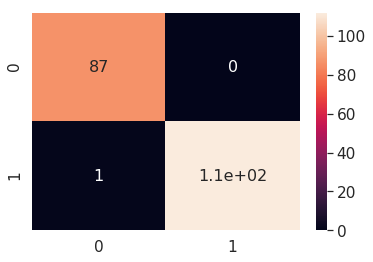

In [286]:


sns.set(font_scale=1.4)#for label size
sns.heatmap(c_m_tst, annot=True,annot_kws={"size": 16})



In [287]:
f_score = f1_score(test_target, output_tst)
print(f'f_score_test = {f_score}')

f_score_test = 0.9955555555555555


In [288]:
print(f'prevalence_test : {(c_m_tst[0][0]+c_m_tst[1][0])/(sum(c_m_tst[:])[0]+sum(c_m_tst[:])[1])}')

prevalence_test : 0.44


In [290]:
print(f'precision_test = {precision_score(output_tst, test_target)}')

precision_test = 1.0


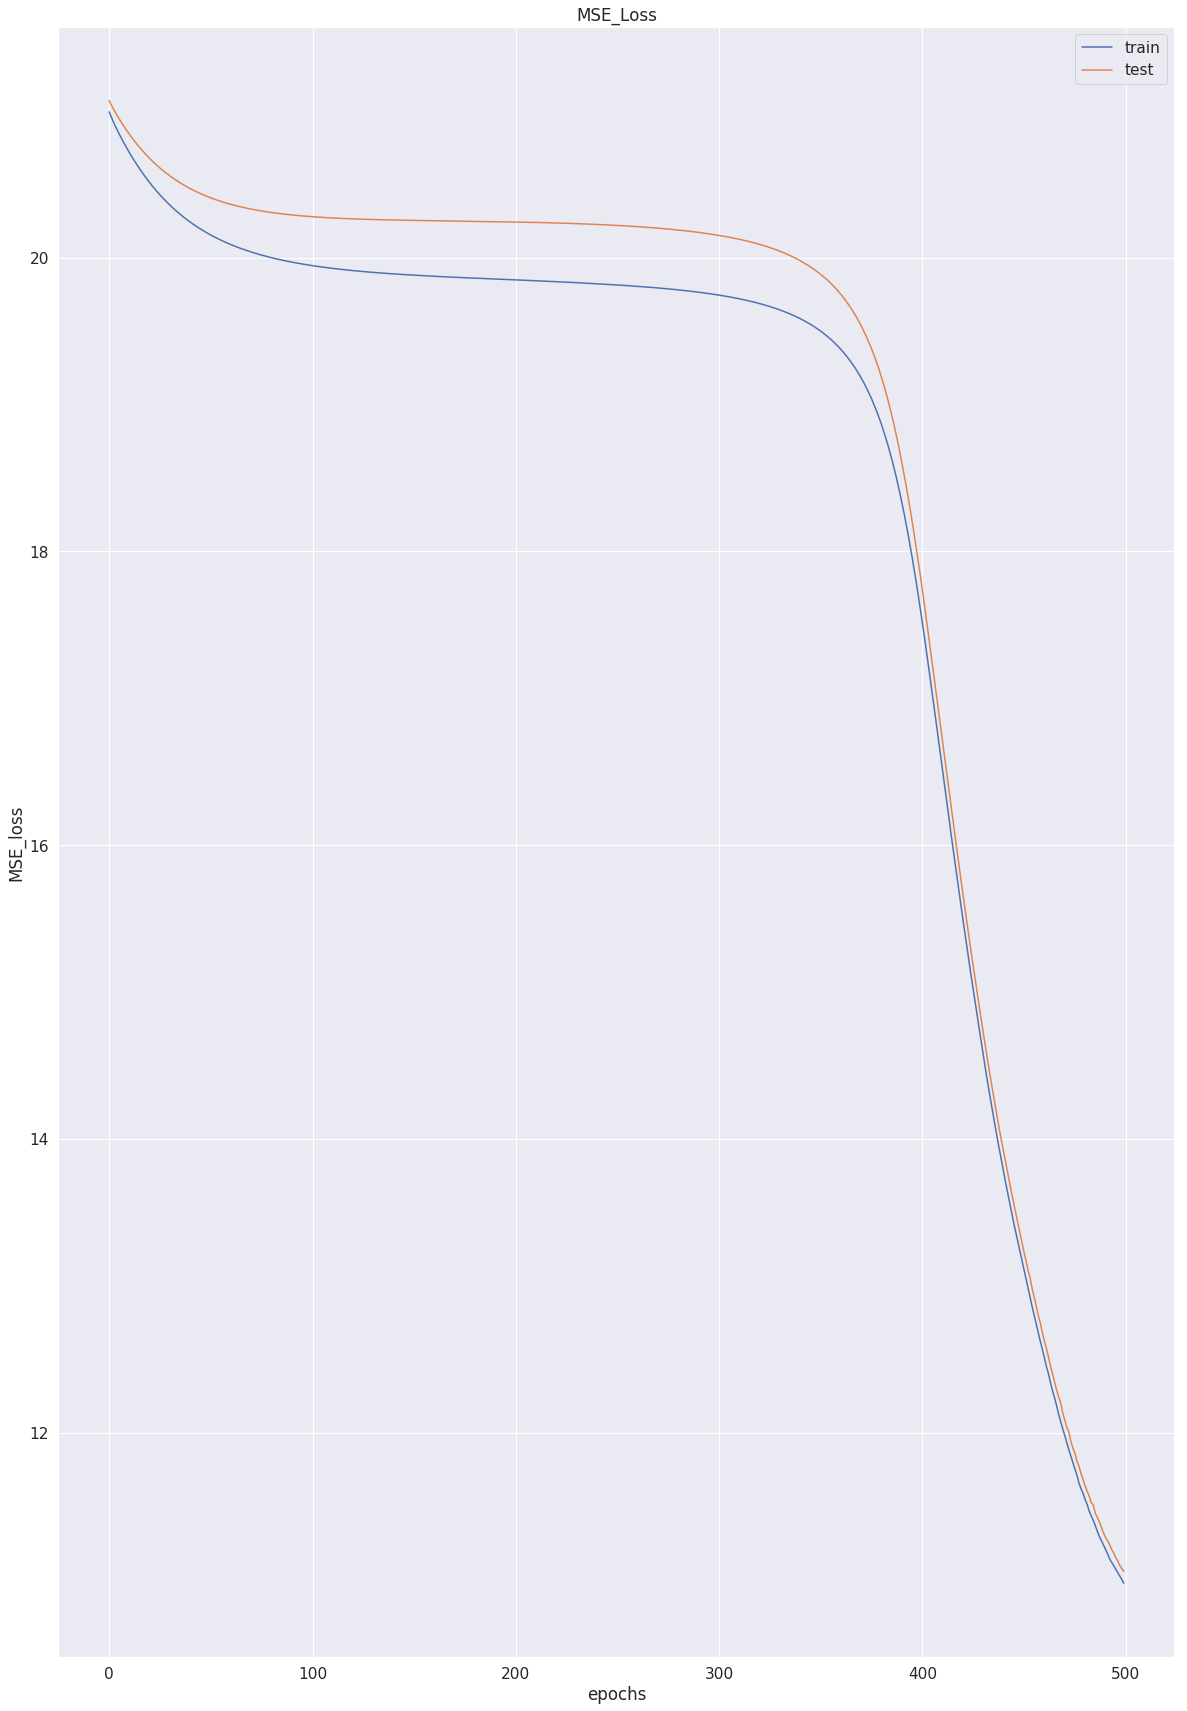

In [291]:
epochs_rang = range(500)
MSE_trainloss = _1_hidtrain.train_loss
MSE_testloss  = _1_hidtrain.test_loss

plot4(MSE_trainloss, MSE_testloss, epochs_rang, 'test','train','epochs','MSE_loss','MSE_Loss')

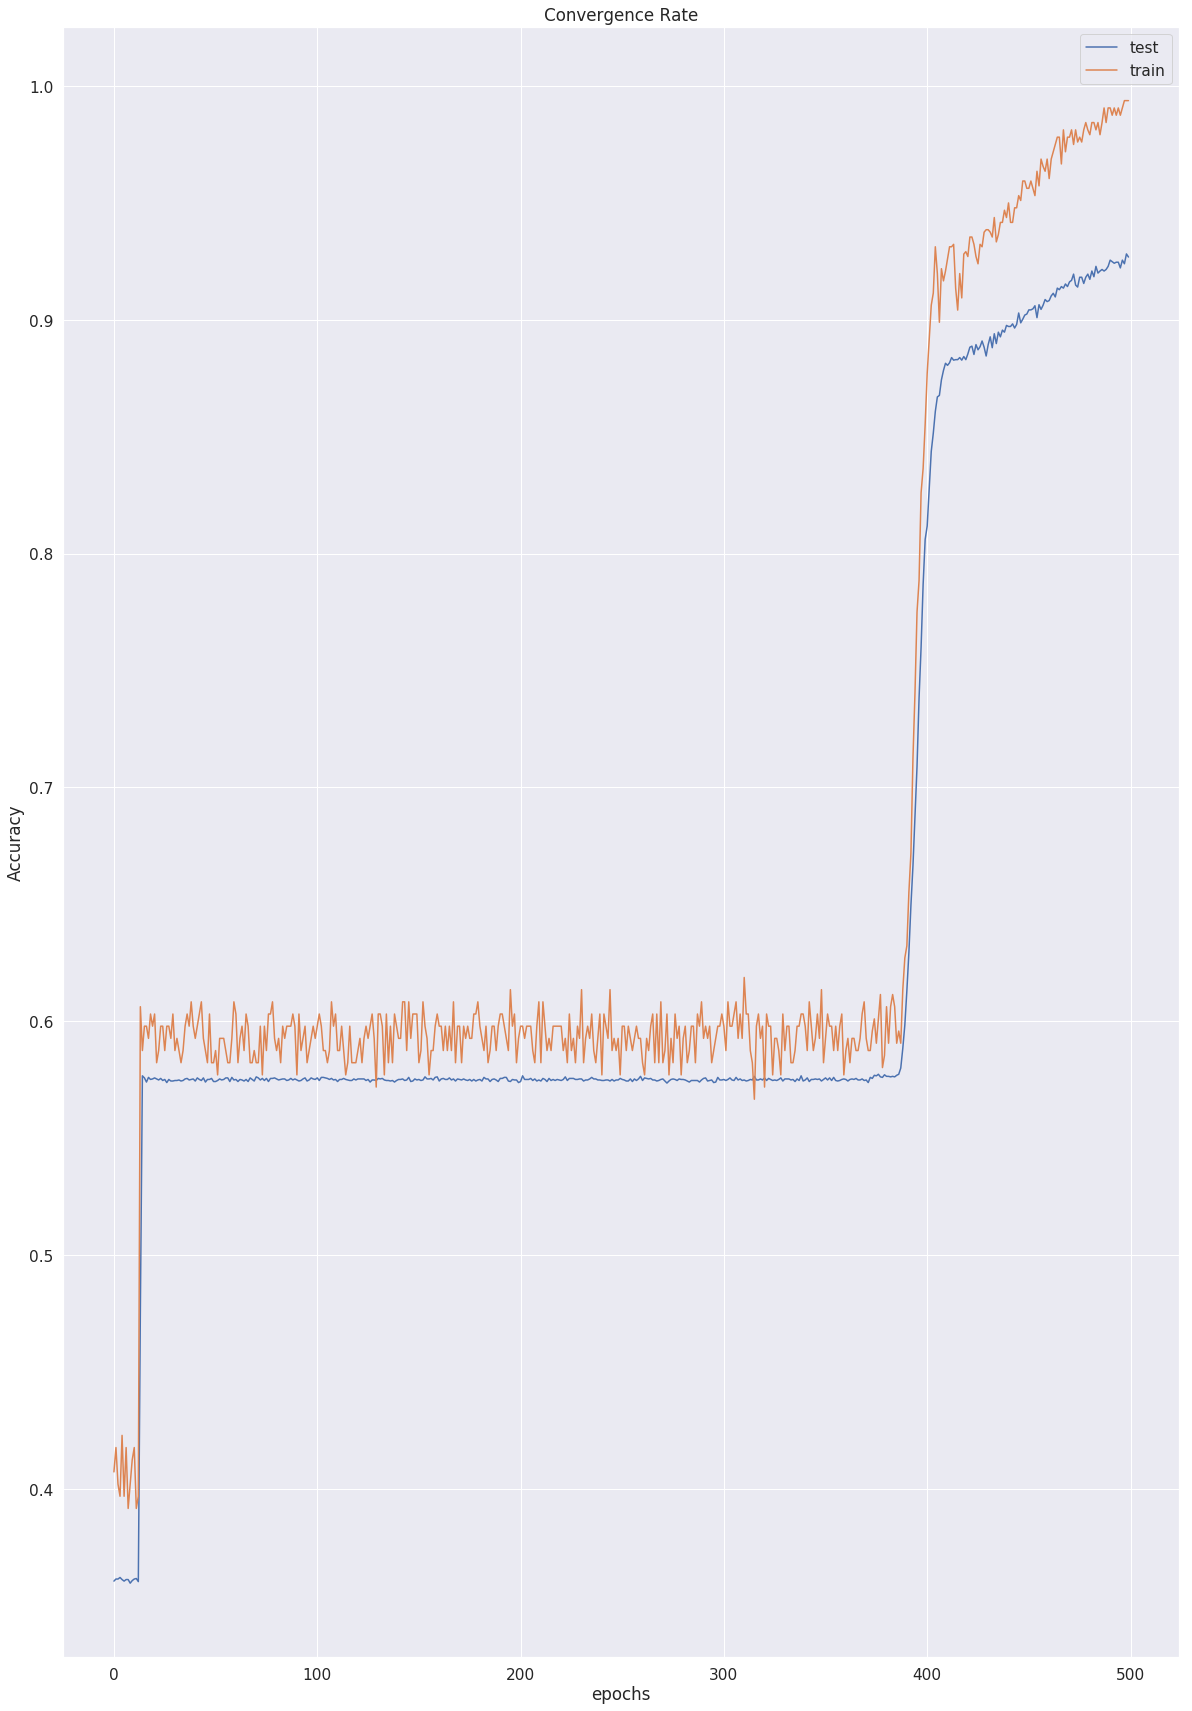

In [292]:
epochs_rang = range(500)
acc_train = _1_hidtrain.train_acc
acc_test  = _1_hidtrain.test_acc

plot4(acc_train, acc_test, epochs_rang, 'train', 'test','epochs','Accuracy','Convergence Rate')

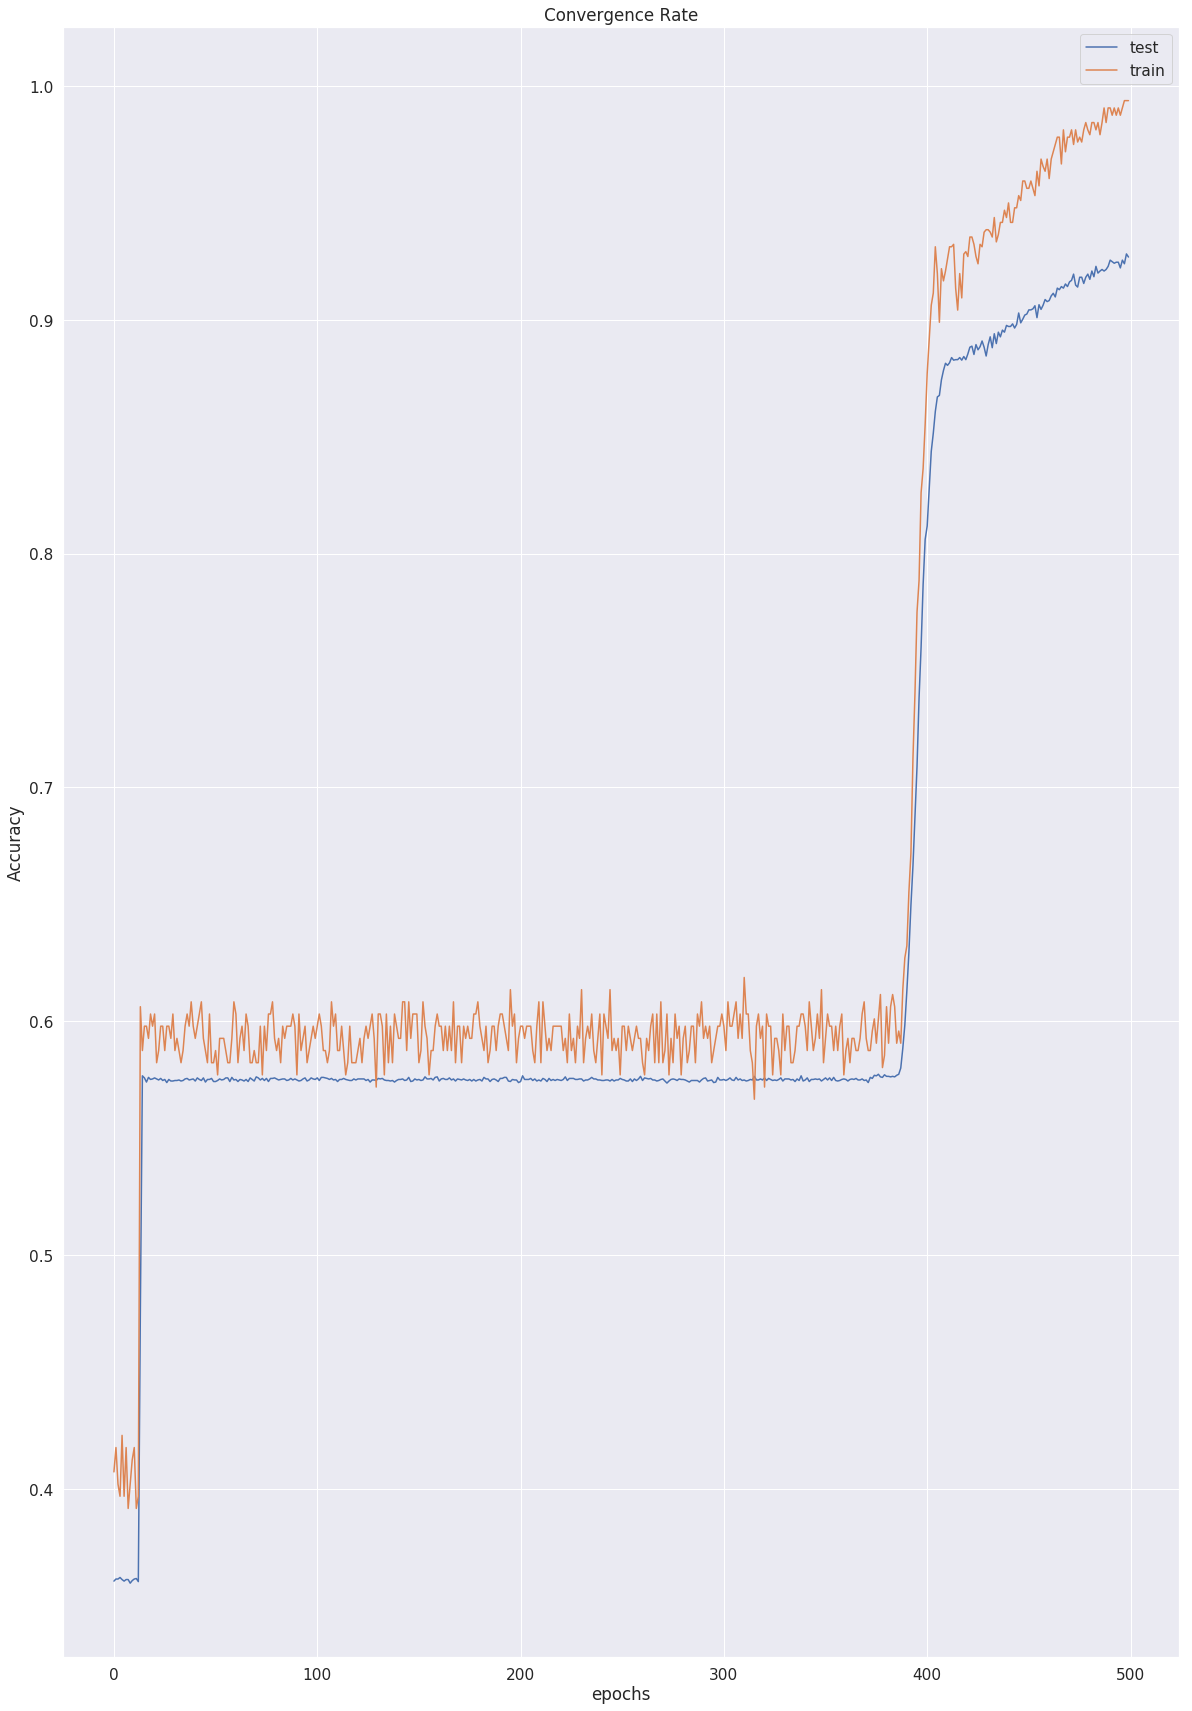

In [293]:
epochs_rang = range(500)
acc_train = _1_hidtrain.train_acc
acc_test  = _1_hidtrain.test_acc

plot4(acc_train, acc_test, epochs_rang, 'train', 'test','epochs','Accuracy','Convergence Rate')

### model 3

In [0]:
_3_hidlay = nn.Sequential(OrderedDict([ 
                                    ("input",       nn.Linear(6, 13)),
                                    ("activ 1",     nn.Sigmoid()),
                                    ("hidden 1 ",   nn.Linear(13,10)),
                                    ('activ 2',     nn.Sigmoid()),
                                    ("hidden 2 ",   nn.Linear(10,8)),
                                    ('activ 3',     nn.ReLU()),
                                    ("hidden 3 ",   nn.Linear(8,2)),
                                    ("sig_out",     nn.Sigmoid())
                                ]))

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(_2_hidlay.parameters(), lr=0.01)

In [0]:
batch_size = 1

In [323]:
_3_hidtrain = train_model()
_3_hidtrain.train(model=_3_hidlay,train_loader=train_loader,valid_loader=val_loader,criterion=criterion,optimizer=optimizer2,epochs=500)

Epoch: 0 	Training Loss: 20.555966 	Validation Loss: 19.540956 
train Accuracy score : 0.579599 	train Precision Score: 0.579599 	train Recall Score: 0.943396	train f1 Score: 0.714504
test Accuracy score : 0.607143 	test Precision Score: 0.607143 	test Recall Score: 1.000000	test f1 Score: 0.790098
test recall increased (0.000000 --> 1.000000).  Saving model ...


Epoch: 1 	Training Loss: 20.555966 	Validation Loss: 19.540955 
train Accuracy score : 0.579599 	train Precision Score: 0.579599 	train Recall Score: 0.943396	train f1 Score: 0.714756
test Accuracy score : 0.580357 	test Precision Score: 0.580357 	test Recall Score: 1.000000	test f1 Score: 0.766283
Epoch: 2 	Training Loss: 20.555966 	Validation Loss: 19.540956 
train Accuracy score : 0.579599 	train Precision Score: 0.579599 	train Recall Score: 0.943396	train f1 Score: 0.714874
test Accuracy score : 0.566964 	test Precision Score: 0.566964 	test Recall Score: 1.000000	test f1 Score: 0.754984
Epoch: 3 	Training Loss: 20.55596

In [324]:
_2_hidtrain.model.cpu().eval()
output_trn = _2_hidtrain.model(train).cpu().topk(1)[1]
acc_scor = accuracy_score(output_trn, train_target)
print(f'training accuracy : {acc_scor}')

training accuracy : 0.994375
training accuracy : 0.994375


In [325]:
_2_hidtrain.model.cpu().eval()
output_val = _2_hidtrain.model(val).cpu().topk(1)[1]
acc_scor = accuracy_score(output_val, val_target)
print(f'validation accuracy : {acc_scor}')

validation accuracy : 0.995
validation accuracy : 0.995


In [326]:
_2_hidtrain.model.cpu().eval()
output_tst = _2_hidtrain.model(test).cpu().topk(1)[1]
acc_scor = accuracy_score(output_tst, test_target)
print(f'test accuracy : {acc_scor}')

test accuracy : 1.0
test accuracy : 1.0


In [327]:
c_m_tst = confusion_matrix(output_tst, test_target)
c_m_trn = confusion_matrix(output_trn, train_target)

c_m_tst = confusion_matrix(output_tst, test_target)
sen = c_m_tst[0][0]/(c_m_tst[0][0] + c_m_tst[1][0])
sen

1.0

1.0

In [328]:
spe = 1-sen
spe

0.0

0.0

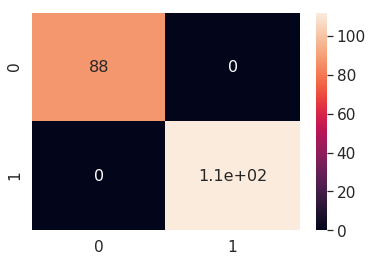

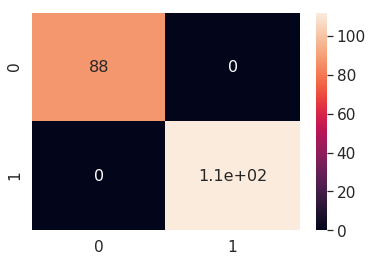

In [329]:


sns.set(font_scale=1.4)#for label size
sns.heatmap(c_m_tst, annot=True,annot_kws={"size": 16})



In [330]:
f_score = f1_score(test_target, output_tst)
print(f'f_score_test = {f_score}')

f_score_test = 1.0
f_score_test = 1.0


In [331]:
print(f'prevalence_test : {(c_m_tst[0][0]+c_m_tst[1][0])/(sum(c_m_tst[:])[0]+sum(c_m_tst[:])[1])}')

prevalence_test : 0.44
prevalence_test : 0.44


In [332]:
print(f'precision_test = {precision_score(output_tst, test_target)}')

precision_test = 1.0
precision_test = 1.0


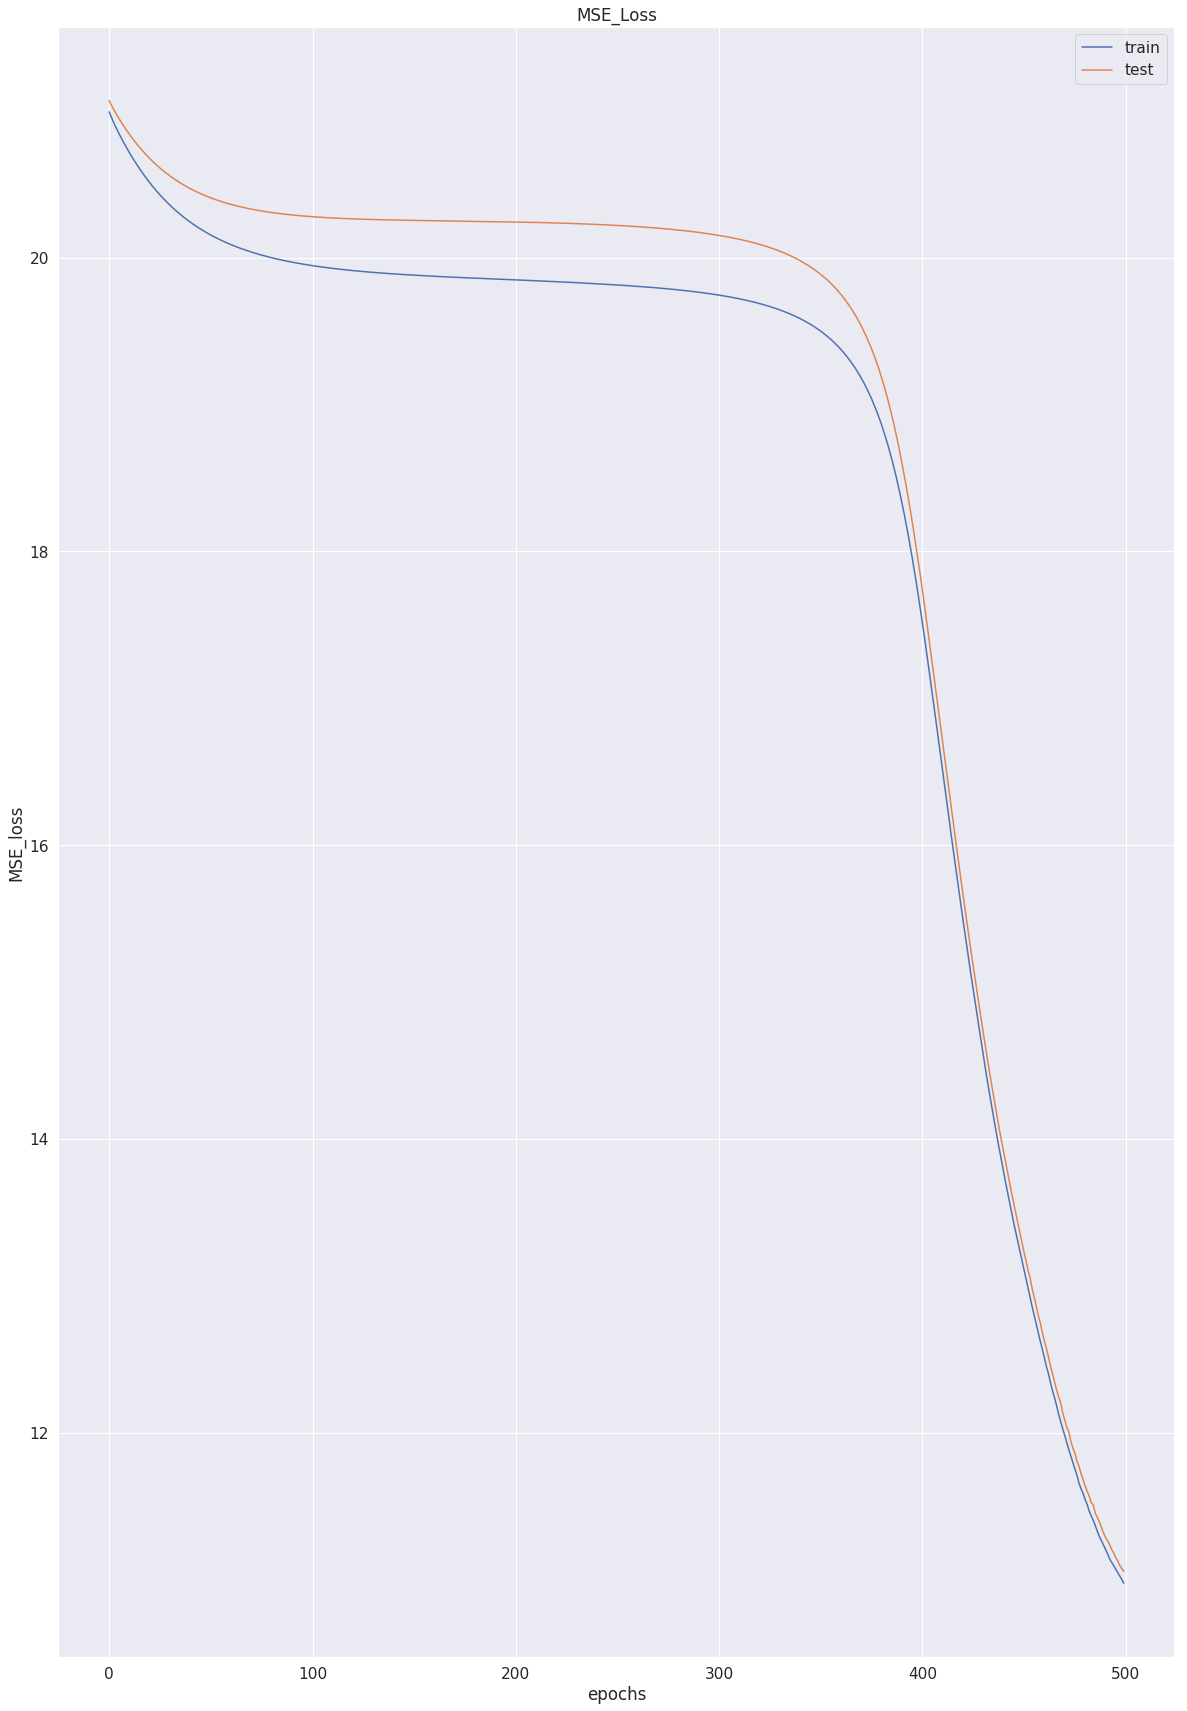

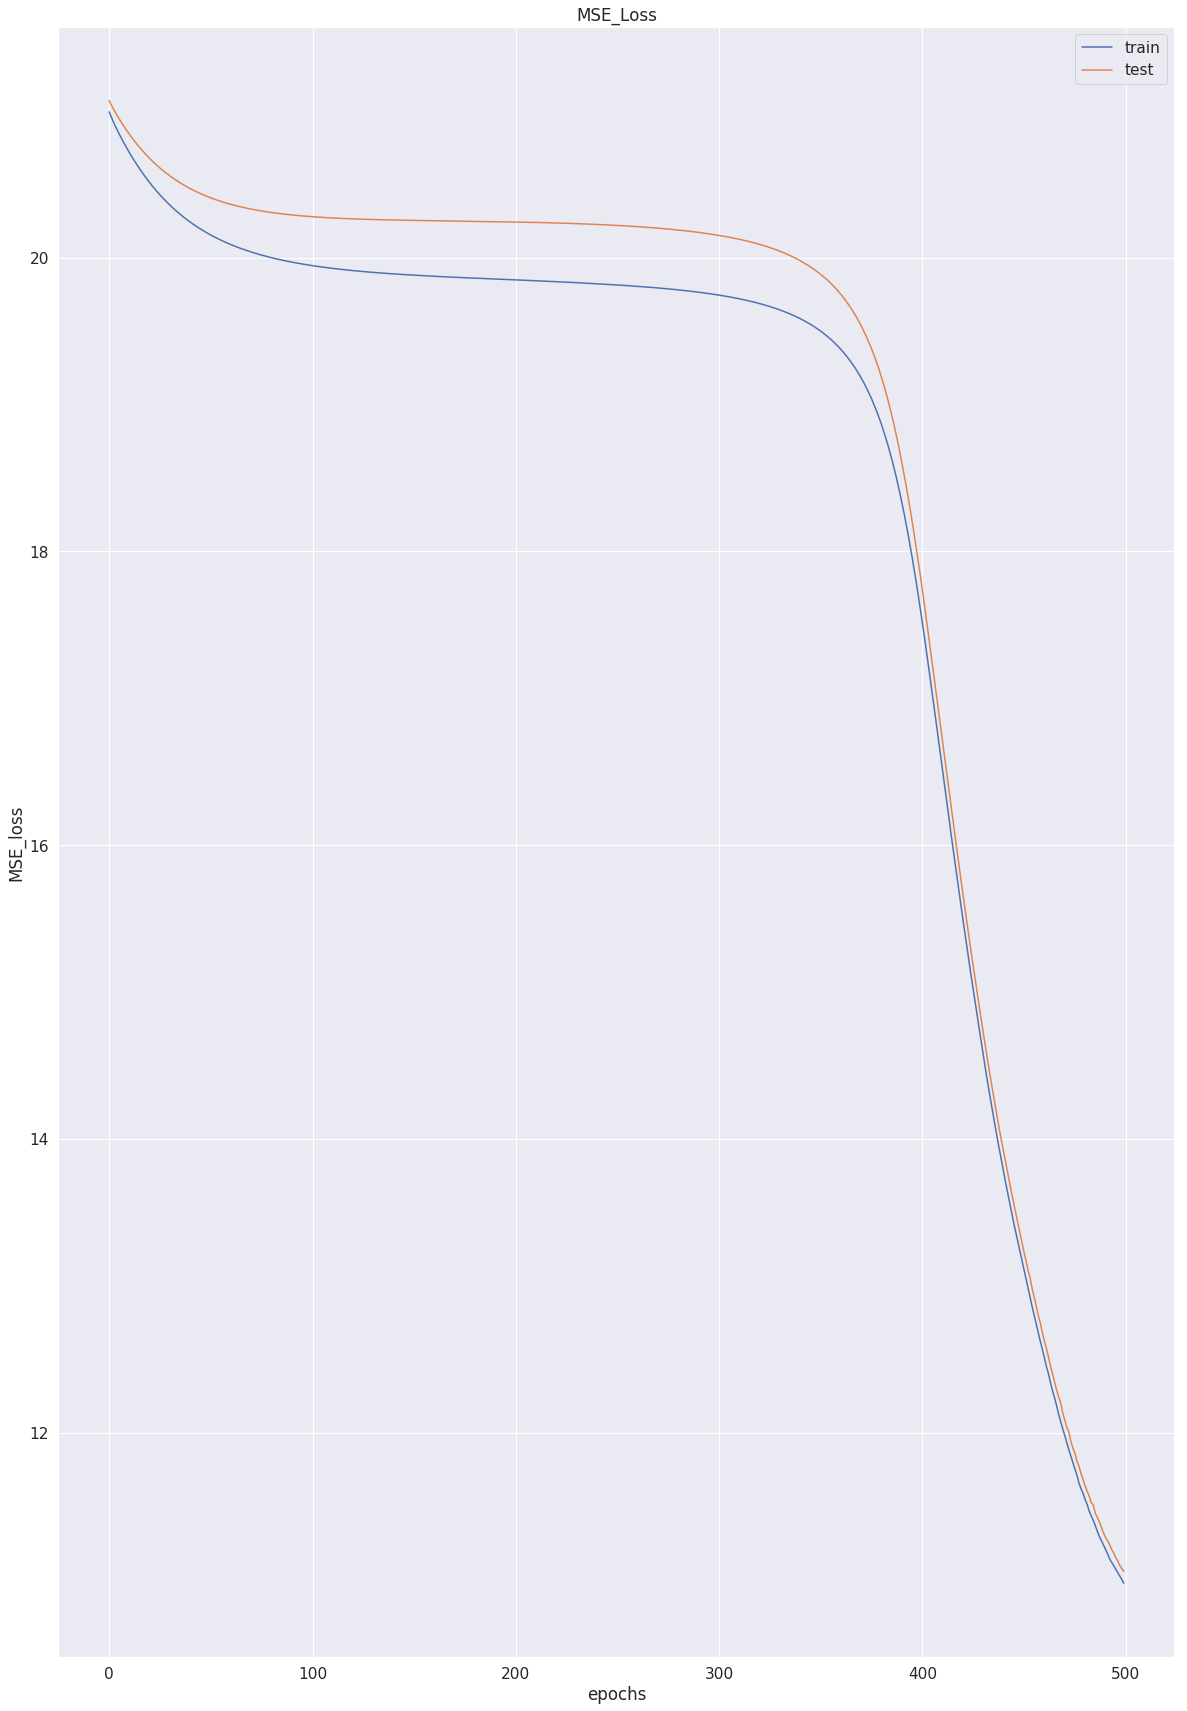

In [333]:
epochs_rang = range(500)
MSE_trainloss = _1_hidtrain.train_loss
MSE_testloss  = _1_hidtrain.test_loss

plot4(MSE_trainloss, MSE_testloss, epochs_rang, 'test','train','epochs','MSE_loss','MSE_Loss')

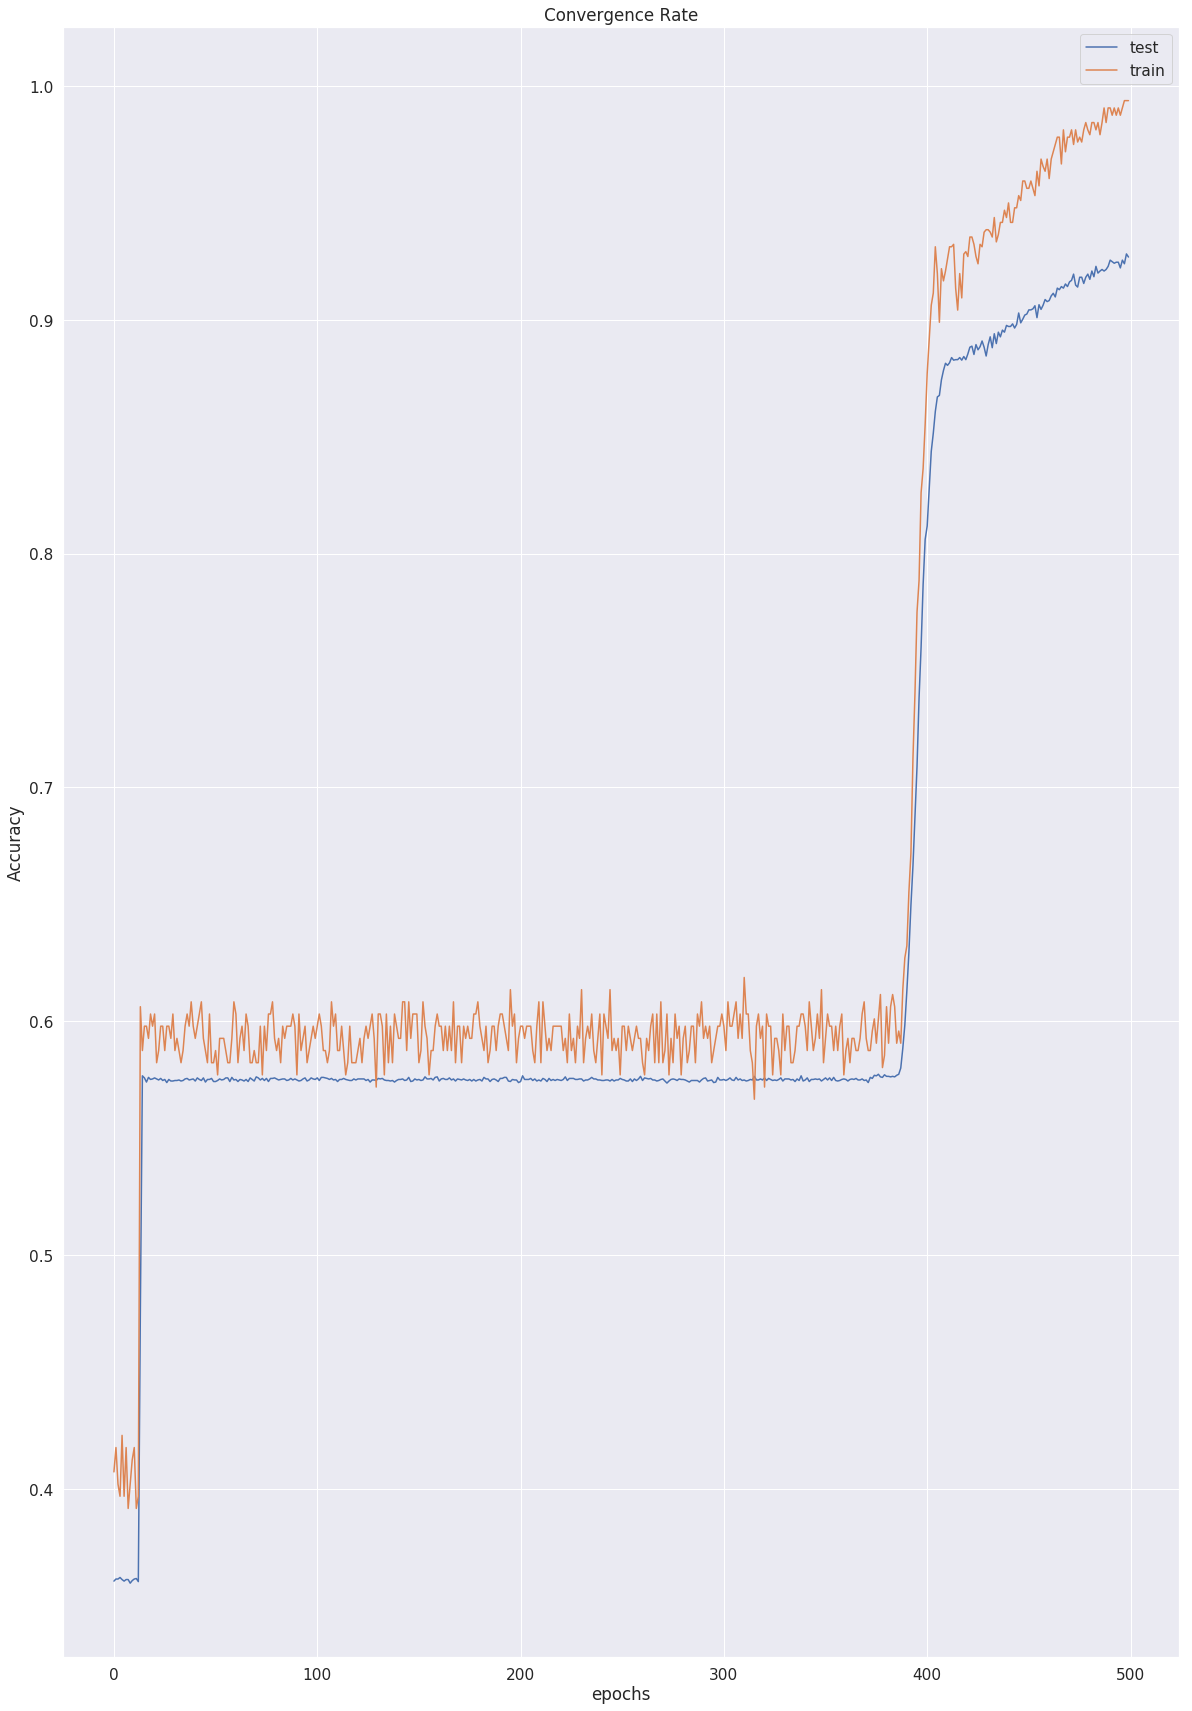

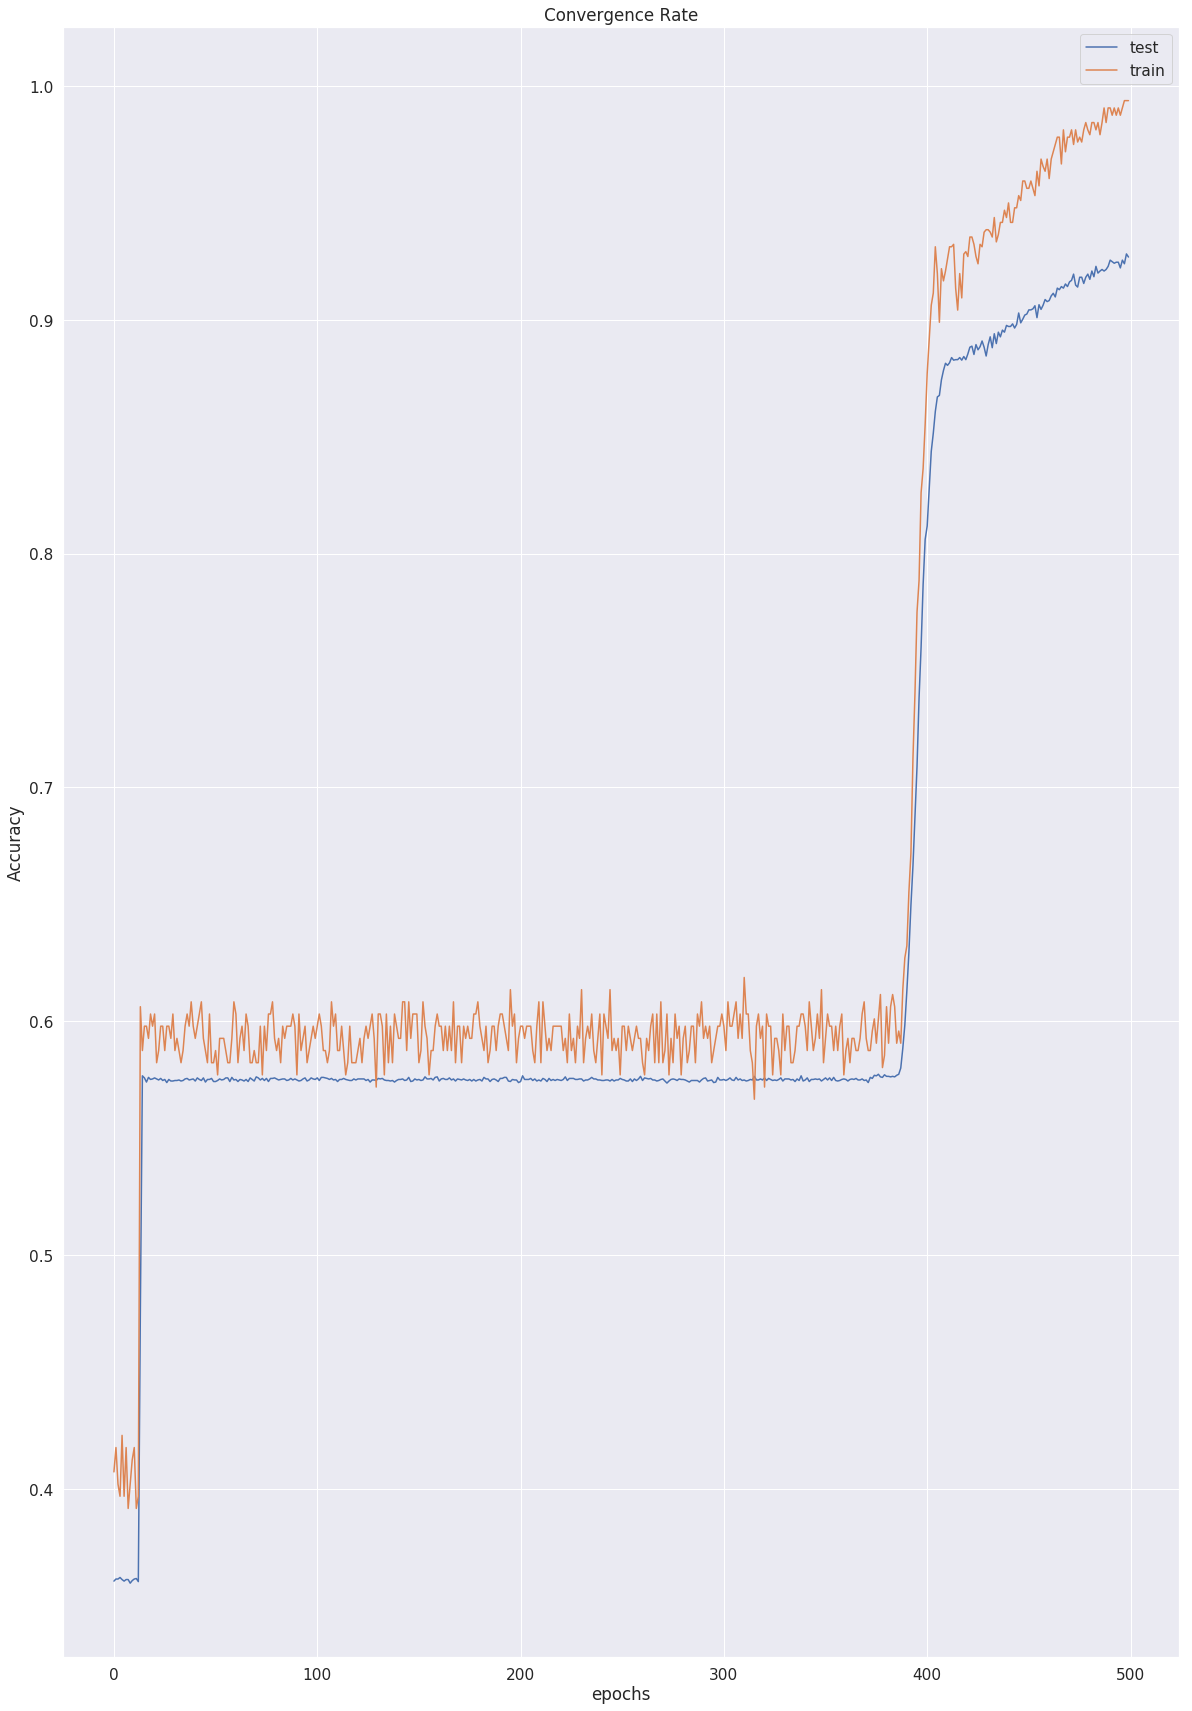

In [334]:
epochs_rang = range(500)
acc_train = _1_hidtrain.train_acc
acc_test  = _1_hidtrain.test_acc

plot4(acc_train, acc_test, epochs_rang, 'train', 'test','epochs','Accuracy','Convergence Rate')

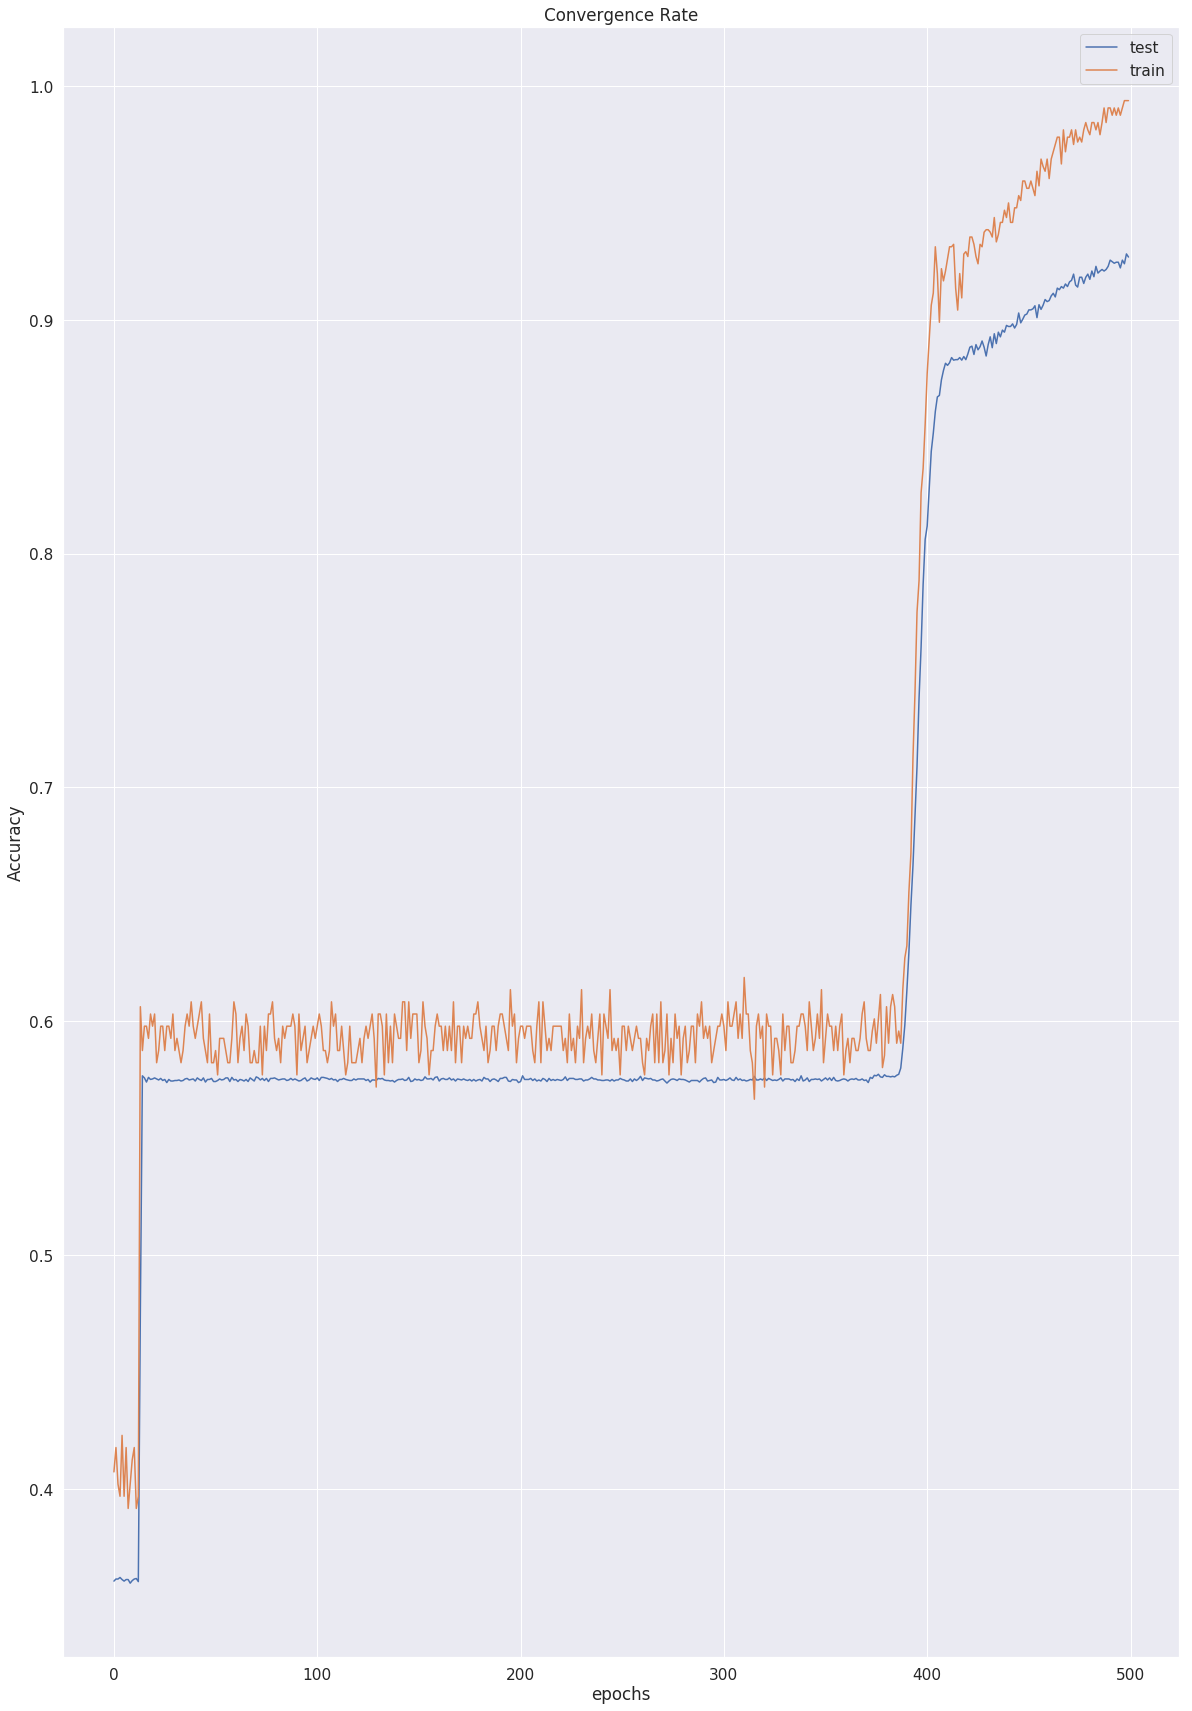

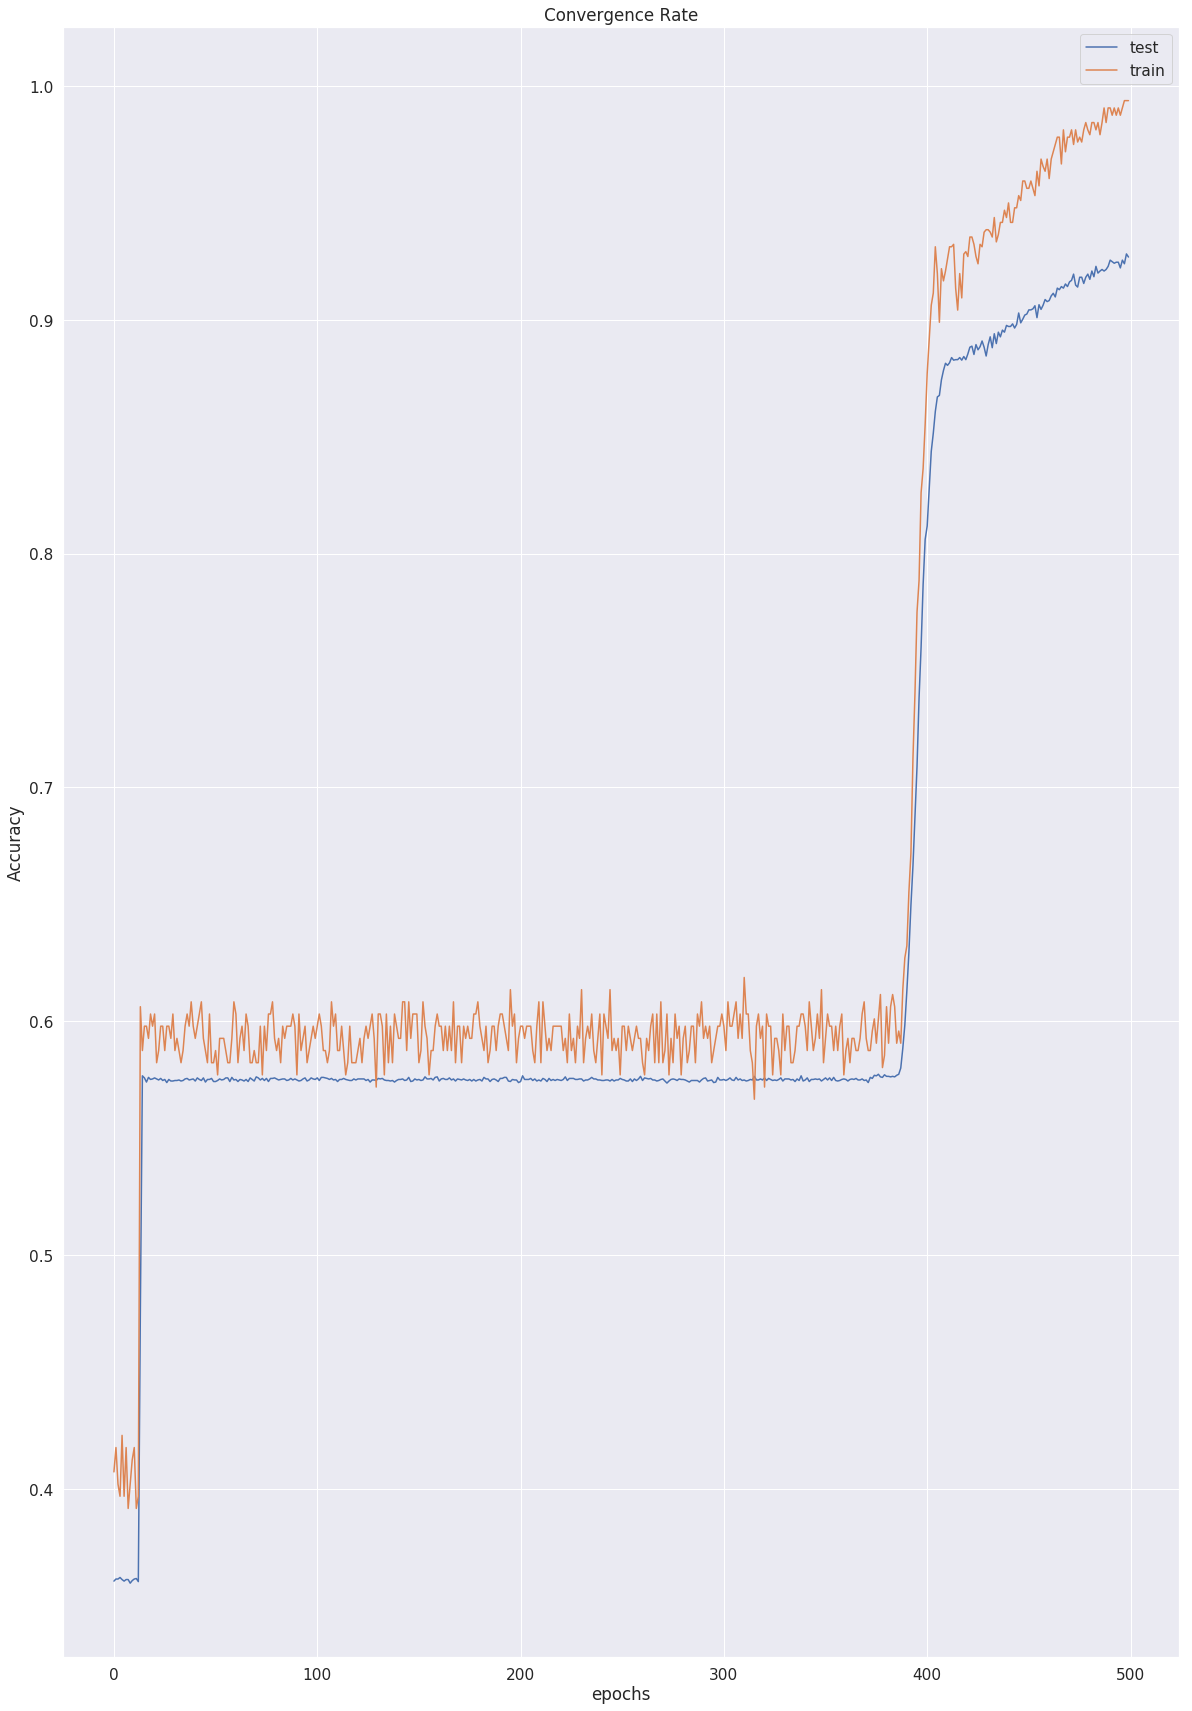

In [335]:
epochs_rang = range(500)
acc_train = _1_hidtrain.train_acc
acc_test  = _1_hidtrain.test_acc

plot4(acc_train, acc_test, epochs_rang, 'train', 'test','epochs','Accuracy','Convergence Rate')

#### Truth Table

In [0]:
x_trn = np.array([[1,1], [1, 0], [0, 1], [0, 0]])
y = np.array([1, 0, 0, 0])
y_trn = keras.utils.to_categorical(y, 2)

In [0]:
train_target = tch.tensor(y)
train =        tch.tensor(x.astype(np.float32)) 

train_tensor = tch.utils.data.TensorDataset(train, train_target) 
train_loader = tch.utils.data.DataLoader(dataset = train_tensor, batch_size = 2, shuffle = True)

In [0]:
_4_hidlay = nn.Sequential(OrderedDict([ 
                                    ("input",       nn.Linear(2, 13)),
                                    ("activ 1",     nn.Sigmoid()),
                                    ("hidden 1 ",   nn.Linear(13,2)),
                                    ("sig_out",     nn.Sigmoid())
                                ]))

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(_4_hidlay.parameters(), lr=0.01)

In [0]:
batch_size = 2

In [427]:
_2_hidtrain.model.cpu().eval()
output_val = _2_hidtrain.model(val).cpu().topk(1)[1]
acc_scor = accuracy_score(output_val, val_target)
print(f'validation accuracy : {acc_scor}')

validation accuracy : 0.995


In [478]:
#Build Architechture

model = Sequential()
model.add(Dense(13, input_dim=2, activation='tanh'))
model.add(Dropout(0.8))
model.add(Dense(10,activation='sigmoid'))
model.add(Dropout(0.7))
model.add(Dense(8,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

W0825 16:23:36.986613 139733316900736 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0825 16:23:37.012980 139733316900736 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


In [0]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [480]:
#model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 13)                39        
_________________________________________________________________
dropout_4 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                140       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 18        
Total para

In [486]:
#train model
model.fit(x=x_trn, y=y_trn, batch_size=32, epochs=10, validation_data=(x_trn, y_trn))

Train on 4 samples, validate on 4 samples
Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6269 - acc: 0.7500 - val_loss: 0.8980 - val_acc: 0.2500
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 0.9046 - acc: 0.5000 - val_loss: 0.8841 - val_acc: 0.2500
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 0.8069 - acc: 0.5000 - val_loss: 0.8704 - val_acc: 0.2500
Epoch 4/10
4/4 [==============================] - 0s 1ms/step - loss: 0.7974 - acc: 0.5000 - val_loss: 0.8560 - val_acc: 0.2500
Epoch 5/10
4/4 [==============================] - 0s 995us/step - loss: 0.8533 - acc: 0.5000 - val_loss: 0.8492 - val_acc: 0.2500
Epoch 6/10
4/4 [==============================] - 0s 1ms/step - loss: 0.5183 - acc: 0.7500 - val_loss: 0.8499 - val_acc: 0.2500
Epoch 7/10
4/4 [==============================] - 0s 1ms/step - loss: 0.8313 - acc: 0.7500 - val_loss: 0.8462 - val_acc: 0.2500
Epoch 8/10
4/4 [==============================] - 0s 991us/s